# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

Изменение номер 1

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
data = pd.read_csv('real_estate_data.csv', sep='\t')
display(data.head())
pd.set_option('display.max_columns', 22)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Посмотрим общую информацию о датасете. Обратим внимание на количество пропусков в столбцах, а также типы данных.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Из общей информации видно, что в некоторых столбцах (`ceiling_height, , living_area, is_apartment, kitchen_area, balcony, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition`) много пропусков. Также тип данных в некоторых столбцах не соответсвует их содежанию. Например столбец `is_apartment` (является ли квартира апартаментом) должен содержать булевое значение. А столбцы `floors_total, parks_around3000, ponds_around3000, days_exposition` - целые числа.

Для наглядности построим общую гистограмму для таблицы.

In [1]:
# data.hist(bins=50, figsize=(15, 20))

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

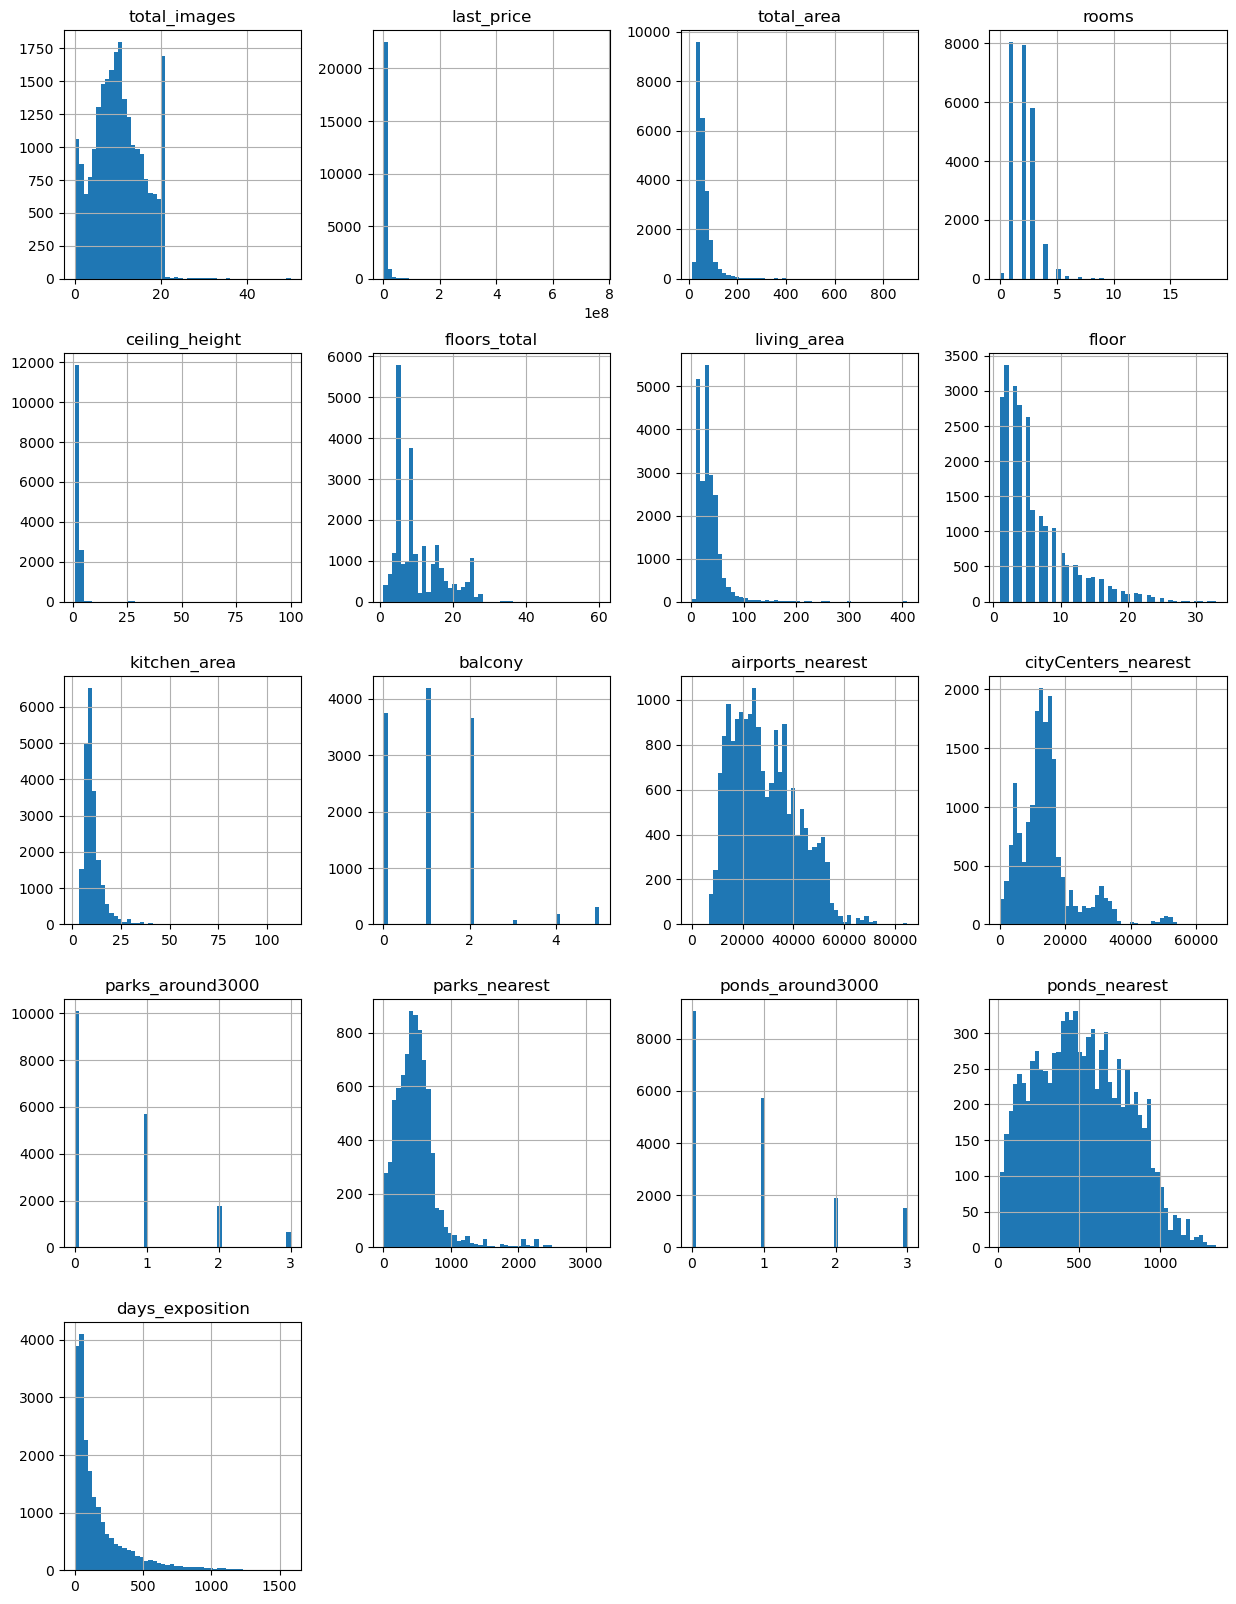

In [6]:
# data.hist(bins=50, figsize=(15, 20))

**Вывод:**

По гистограммам видно, что в значениях `total_area, living_area, kitchen_area` а также  last_price очень длинный хвост справа, значит много выбросов высоких значений. много  в столбце `rooms`, `living_area` и `days_exposition` подозрительныt выбросы около 0. В `ceiling_height` странные выбросы более 25м.

### Предобработка данных

#### Работа с пропусками

In [7]:
print(data.isnull().sum()) 

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64


* Посмотрим пристальнее на столбцы с пропусками. Больше всего пропусков в столбце `is_apartment`. Этот столбец содерит информацию о том является ли объект недвижимости апартаментом, и должен содержать булевое значение. Скорее всего пропуск свидетельствует о том, что это не апартамент, и можно заменить пропуск на значение `False`. И сразу после замены проверим тип данных.

In [8]:
data['is_apartment'].unique()

array([nan, False, True], dtype=object)

In [9]:
data['is_apartment'] = data['is_apartment'].fillna(False)
data.is_apartment.dtype

dtype('bool')

Всё верно: булевый тип.

* Обработаем столбец `balcony`. Для начала посмотрим какие значения есть в этом столбце.

In [10]:
data['balcony'].unique()

array([nan,  2.,  0.,  1.,  5.,  4.,  3.])

Аналогично `is_apartment` поступим и с пропусками в столбце `balcony`. Если не указано, значит скорее всего балкона нет. Очевидно, что количество балконов это целое число. Сразу преобразуем тип данных в int.

In [11]:
data['balcony'] = data['balcony'].fillna(0).astype('int64')
data['balcony'].value_counts()

0    15277
1     4195
2     3659
5      304
4      183
3       81
Name: balcony, dtype: int64

* Также поступим и со стобцами `parks_around3000` (число парков в радиусе 3 км) и `ponds_around3000` (число водоёмов в радиусе 3 км). Если не указано, значит в радиусе 3 км их нет. Сразу преобразуем тип данных в int.

In [12]:
data['parks_around3000'].unique()

array([ 1.,  0.,  2., nan,  3.])

In [13]:
data['parks_around3000'] = data['parks_around3000'].fillna(0).astype('int64')
data['parks_around3000'].value_counts()

0    15624
1     5681
2     1747
3      647
Name: parks_around3000, dtype: int64

In [14]:
data['ponds_around3000'].unique()

array([ 2.,  0.,  3.,  1., nan])

In [15]:
data['ponds_around3000'] = data['ponds_around3000'].fillna(0).astype('int64')
data['ponds_around3000'].value_counts()

0    14589
1     5717
2     1892
3     1501
Name: ponds_around3000, dtype: int64

* Посмотрим на такой важный параметр как населённый пункт.

In [16]:
data['locality_name'].isna().sum()

49

Для 49 объесктов недвижимости не указано местоположение. С учётом того, что местоположение один из главных факторов влияющих на стоимость, а количество пропусков крайне мало - отбросим их.

In [17]:
data.dropna(subset='locality_name', inplace=True)

In [18]:
data['locality_name'].isna().sum()

0

* Посмотрим на пропуски в столбце `floors_total` - этажность дома.

In [15]:
data['floors_total'].isna().sum()

85

Возможно этаж не указан потому что это частный 1-этажный дом. Проверим.

In [16]:
data[data['floors_total'].isna()]['floor'].value_counts()

4     9
6     9
8     8
12    6
9     5
21    4
5     4
7     4
3     4
19    3
11    3
13    3
1     3
18    3
15    3
10    3
24    2
2     2
20    2
14    2
22    1
17    1
23    1
Name: floor, dtype: int64

Предположение не подтвердилось и пропуски в этом столбце это случайные ошибки, скорее всего допущенные из-за человеческого фактора. Таких строк всего лишь 85. Отбросим их.

In [17]:
data.dropna(subset='floors_total', inplace=True)

* Теперь обратим внимание на высоту потолков - `ceiling_height`.

In [18]:
data['ceiling_height'].isna().sum()

9084

In [19]:
data['ceiling_height'].isna().sum() / len(data['ceiling_height'])

0.3854869509866327

38% пропусков. Это очень много. К тому есть выбросы. Заполним пропущенные значения после работы с аномальными значениями в следующем блоке.

* Также есть пропуски в столбце `days_exposition` -  сколько дней было размещено объявление. Эти пропуски могут быть случайными, но также возможно, что объявление не было снято с публицации, то есть оно всё ещё актуально. Если это предположение верно, то процент таких объявлений в более поздних годах должен быть выше. Займемся этим в следующих пунктах, после того как выделим год публикации отдельным столбцом.

* В картографических данных также есть пропуски. Скорее всего это технические ошибки при сборе информации из разных источников. Но их исправить невозможно.

**Вывод**

Были заполнены пропуски в столбцах `is_apartment, balcony, parks_around3000, ponds_around3000`. Для столбцов `locality_name, floors_total` логическое заполнение пропусков невозможно. Так как количество пропусков в этих столбцах невелико, мы избавились от строк с пропусками в этим столбцах.  С пропусками в `ceiling_height` и `days_exposition` поработаем в следующем разделе, так как они требуют более тщательного исследования. В картографических данных также есть пропуски. Скорее всего это технические ошибки при сборе информации из разных источников. Но их исправить невозможно.

#### Замена типов данных

* Заменим тип данных в следующих столбцах на цельночисленный, так как в них указано количество этажей, парков и т.д.:
`floors_total, parks_around3000, ponds_around3000, days_exposition`

In [20]:
data['floors_total'] = data['floors_total'].astype('int64')

* Заменим тип данных в столбце `first_day_exposition` на тип datetime.

In [21]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

**Вывод**

Были заменены типы данных в следующих столбцах: `floors_total, balcony, parks_around3000, ponds_around3000` на целые числа. В столбце `first_day_exposition` тип данных заменили на datetime.

#### Работа с дубликатами

* Проверим данные на явные дубликаты.

In [22]:
data.duplicated().sum()

0

* Явных дубликатов нет. Посмотрим неочевидные.

In [23]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Названия некоторых населённых пунктов записаны в разной форме. Например: "поселок Рябово" - "поселок городского типа Рябово", "поселок Тельмана" - "посёлок Тельмана", " Устраним неявные дубликаты путём замены всех подобрых формульровок на слово "посёлок". Сначала разберёмся с буквами "е-ё" во всех "поселках-посёлках".

In [24]:
data = data.replace('поселок', 'посёлок', regex=True)
data.loc[data['locality_name'].str.contains('поселок') == True, 'locality_name']

Series([], Name: locality_name, dtype: object)

"Поселков" не осталось. Займемся остальными дубликатами.

In [25]:
data = data.replace(['посёлок городского типа', 'городской посёлок'], 'посёлок', regex=True)

 Для окончательной проверки переведём всё в нижний регистр.

In [26]:
data['locality_name'] = data['locality_name'].str.lower()
data.duplicated().sum()

0

**Вывод:** Мы не обнаружили явные дубликаты. Удалены неочевидные дубликаты из столбца `locality_name`. Теперь каждый населённый пункт записан в одной единственной форме. Также названия всех населённых пунктов привели к нижнему регистру для окончательной проверки на явные дубликаты.

#### Работа с аномальными значениями

##### Высота потолков - ceiling_height

* Посмотрим ещё раз на гистограммы из пункта 1, а также посмотрим уникальные значения столбца.

In [27]:
data['ceiling_height'].describe()

count    14481.000000
mean         2.771283
std          1.261983
min          1.000000
25%          2.510000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

In [28]:
data['ceiling_height'].sort_values().unique()

array([  1.  ,   1.2 ,   1.75,   2.  ,   2.2 ,   2.25,   2.3 ,   2.34,
         2.4 ,   2.45,   2.46,   2.47,   2.48,   2.49,   2.5 ,   2.51,
         2.52,   2.53,   2.54,   2.55,   2.56,   2.57,   2.58,   2.59,
         2.6 ,   2.61,   2.62,   2.63,   2.64,   2.65,   2.66,   2.67,
         2.68,   2.69,   2.7 ,   2.71,   2.72,   2.73,   2.74,   2.75,
         2.76,   2.77,   2.78,   2.79,   2.8 ,   2.81,   2.82,   2.83,
         2.84,   2.85,   2.86,   2.87,   2.88,   2.89,   2.9 ,   2.91,
         2.92,   2.93,   2.94,   2.95,   2.96,   2.97,   2.98,   2.99,
         3.  ,   3.01,   3.02,   3.03,   3.04,   3.05,   3.06,   3.07,
         3.08,   3.09,   3.1 ,   3.11,   3.12,   3.13,   3.14,   3.15,
         3.16,   3.17,   3.18,   3.2 ,   3.21,   3.22,   3.23,   3.24,
         3.25,   3.26,   3.27,   3.28,   3.29,   3.3 ,   3.31,   3.32,
         3.33,   3.34,   3.35,   3.36,   3.37,   3.38,   3.39,   3.4 ,
         3.42,   3.43,   3.44,   3.45,   3.46,   3.47,   3.48,   3.49,
      

Среднее значение и медианное довольно сильно отличаются. Можно предположить наличие выбросов высоких значений. Видно, что нижний квартиль составляет 2,5 м, а верхний 2,8 м. Это вполне соответсвует реальности. Однако есть странные значения: 1, 1.2, 1.75 и 100 м. Это явные ошибки. Эти значения придётся отбросить. А вот значения 20... 32.0 м попробуем исправить. Похоже, что кто-то ошибся на порядок когда вручную вводил высоту потолков. Исправим и сохраним их в талице.

In [29]:
data = data[~(data.ceiling_height < 2) & (data.ceiling_height != 100)]

In [30]:
data['ceiling_height'] = data['ceiling_height'].apply(lambda x: x/10 if x>=20 else x)

Посмотрим ещё раз уникальные значения.

In [31]:
data['ceiling_height'].sort_values().unique()

array([ 2.  ,  2.2 ,  2.25,  2.26,  2.3 ,  2.34,  2.4 ,  2.45,  2.46,
        2.47,  2.48,  2.49,  2.5 ,  2.51,  2.52,  2.53,  2.54,  2.55,
        2.56,  2.57,  2.58,  2.59,  2.6 ,  2.61,  2.62,  2.63,  2.64,
        2.65,  2.66,  2.67,  2.68,  2.69,  2.7 ,  2.71,  2.72,  2.73,
        2.74,  2.75,  2.76,  2.77,  2.78,  2.79,  2.8 ,  2.81,  2.82,
        2.83,  2.84,  2.85,  2.86,  2.87,  2.88,  2.89,  2.9 ,  2.91,
        2.92,  2.93,  2.94,  2.95,  2.96,  2.97,  2.98,  2.99,  3.  ,
        3.01,  3.02,  3.03,  3.04,  3.05,  3.06,  3.07,  3.08,  3.09,
        3.1 ,  3.11,  3.12,  3.13,  3.14,  3.15,  3.16,  3.17,  3.18,
        3.2 ,  3.21,  3.22,  3.23,  3.24,  3.25,  3.26,  3.27,  3.28,
        3.29,  3.3 ,  3.31,  3.32,  3.33,  3.34,  3.35,  3.36,  3.37,
        3.38,  3.39,  3.4 ,  3.42,  3.43,  3.44,  3.45,  3.46,  3.47,
        3.48,  3.49,  3.5 ,  3.51,  3.52,  3.53,  3.54,  3.55,  3.56,
        3.57,  3.58,  3.59,  3.6 ,  3.62,  3.63,  3.65,  3.66,  3.67,
        3.68,  3.69,

* Вернёмся теперь когда мы удалили аномальные значения, вернёмся к заполнению пропусков в `ceiling_height`.

In [32]:
data['ceiling_height'].isna().sum()

9084

Это почти 40% пропусков. Попробуем их запонить.
Для типовой застройки высота потолка больше всего зависит от серии дома. Из данных приведённых в датасете можно опираться на этажность: для 5-этажных, 9-этажных домов... есть типовая высота потолка. Теперь заполним пропущенные значения медианым значением высоты потолка для каждого типа дома. Выбираем медианное значение так как оно меньше зависит от выбросов.

Напишем цикл, который итерируется по строкам датасета, находит пропуски в ceiling_height, сверяет этажность дома 'floors_total' и заменяет пропуск на медианное значение высоты этажа в данном типе домов.

In [33]:
for t in data['floors_total'].unique():
    data.loc[(data['floors_total'] == t) & (data['ceiling_height'].isna()), 'ceiling_height'] = \
    data.loc[data['floors_total'] == t, 'ceiling_height'].median()

После применение цикла остаётся одно значение Nan в столбце `ceiling_height`, для 33-этажного дома. Так как это единственный такой дом, и он же содержит пропуск в `ceiling_height`. Убрать его можно вручную, присвоив медианное значение по всей колонке.

In [34]:
data.loc[(data['floors_total'] == 33) & (data['ceiling_height'].isna()), 'ceiling_height'] = data['ceiling_height'].median()

In [35]:
data['ceiling_height'].isna().sum()

0

In [36]:
data['ceiling_height'].describe()

count    23561.000000
mean         2.709306
std          0.260809
min          2.000000
25%          2.550000
50%          2.650000
75%          2.750000
max         14.000000
Name: ceiling_height, dtype: float64

Теперь всё в порядке, пропусков нет, минимальное и максимальное значения вполне возможны, медиана и среднее значения близки, стандартное отклонение уменьшилось в 6 раз.

##### Растояние до ближайшего аэропорта - airports_nearest

In [37]:
data['airports_nearest'].describe()

count    18038.000000
mean     28797.062923
std      12633.204783
min          0.000000
25%      18559.000000
50%      26756.500000
75%      37273.000000
max      84869.000000
Name: airports_nearest, dtype: float64

Странный минимум: растояние до аэропорта равно 0. Посмотрим эту строку.

In [38]:
data[data['airports_nearest'] == data['airports_nearest'].min()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
21085,0,7000000.0,34.7,2018-09-23,1,2.7,9,19.8,3,False,False,False,6.0,2,санкт-петербург,0.0,22801.0,0,NaN,0,NaN,60.0


Объект нахдится в Санкт-Петербурге. Очевидно растояние 0 до аэропорта это ошибка. Удалим эту строку.

In [39]:
data = data[data['airports_nearest'] != 0]

In [40]:
data['airports_nearest'].describe()

count    18037.000000
mean     28798.659478
std      12631.735065
min       6450.000000
25%      18565.000000
50%      26757.000000
75%      37273.000000
max      84869.000000
Name: airports_nearest, dtype: float64

Теперь все значения похожи на правду.

##### Количество комнат - rooms

Посмотрим на уникальные значения количества комнат.

In [41]:
data['rooms'].unique()

array([ 3,  1,  2,  4,  5,  6,  0,  7, 11,  8, 14, 10, 15,  9, 19, 16, 12],
      dtype=int64)

In [42]:
data[data['rooms'] == 0]['rooms'].count()

194

Странное количество комнат 0. Таких строк 194. Посмотрим на них.

In [43]:
data[data['rooms'] == 0].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
144,1,2450000.0,27.00,2017-03-30,0,2.75,24,15.50,2,False,True,False,NaN,2,посёлок мурино,NaN,NaN,0,NaN,0,NaN,181.0
349,4,2320000.0,25.00,2017-09-27,0,2.60,14,17.00,1,False,False,True,NaN,0,деревня кудрово,NaN,NaN,0,NaN,0,NaN,45.0
440,8,2480000.0,27.11,2018-03-12,0,2.70,17,24.75,4,False,True,False,NaN,2,санкт-петербург,38171.0,15015.0,0,NaN,2,982.0,64.0
508,0,3375000.0,34.40,2017-03-28,0,2.66,26,24.30,19,False,False,True,NaN,1,посёлок парголово,53115.0,19292.0,0,NaN,1,593.0,430.0
608,2,1850000.0,25.00,2019-02-20,0,2.60,10,NaN,7,False,True,False,NaN,0,посёлок шушары,NaN,NaN,0,NaN,0,NaN,29.0


Скорее всего количестово комнат 0 означает открытыю планировку или 1-комнатную квартиру-студию. Посмотрим так ли это.

In [44]:
# data[(data['rooms'] == 0) & (data['studio'])]['rooms'].count(), \
# data[(data['rooms'] == 0) & (data['open_plan'])]['rooms'].count()
# data[(data['rooms'] == 0) & (data['open_plan']) & (data['studio'])]['rooms'].count()
data[(data['rooms'] == 0)]['studio'].value_counts(), \
data[(data['rooms'] == 0)]['open_plan'].value_counts()

(True     135
 False     59
 Name: studio, dtype: int64,
 False    135
 True      59
 Name: open_plan, dtype: int64)

135 студий + 59 открытых планировок = 194. Если комнат 0, значит это либо открытая планировка или студия. Эти значения вполне нормальны, оставим их без изменений.

##### Жилая площадь - living_area

In [45]:
data['living_area'].isna().sum()

1865

In [46]:
data['living_area'].describe()

count    21695.000000
mean        34.457641
std         22.046878
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

* Минимум жилой площади - 2 мкв. Посмотрим внимательнее на небольшие значения жилой площади

In [47]:
data[data['living_area'] < 8]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3242,7,4440000.0,41.0,2017-07-02,1,2.70,17,3.0,17,False,False,False,11.0,0,санкт-петербург,19272.0,13073.0,0,NaN,0,NaN,216.0
13915,20,6350000.0,52.0,2018-02-06,2,3.00,6,2.0,2,False,False,False,9.0,0,санкт-петербург,32453.0,6521.0,0,NaN,1,1012.0,91.0
16431,13,3799000.0,31.0,2018-04-12,1,2.60,5,6.0,1,False,False,False,17.0,0,санкт-петербург,32177.0,4826.0,1,430.0,0,NaN,168.0
17582,11,2680000.0,22.0,2018-08-11,0,2.75,25,5.0,8,False,True,False,NaN,2,санкт-петербург,22735.0,11618.0,1,835.0,1,652.0,70.0
19251,19,4050000.0,33.0,2018-10-15,1,2.50,22,6.5,21,False,False,False,18.0,0,санкт-петербург,9258.0,10592.0,1,458.0,0,NaN,44.0
21758,0,2330000.0,23.0,2018-01-01,0,2.75,24,2.0,22,False,True,False,NaN,0,посёлок мурино,NaN,NaN,0,NaN,0,NaN,66.0
21943,15,6100000.0,77.6,2019-02-28,4,2.50,9,5.4,1,False,False,False,9.8,0,санкт-петербург,29338.0,11270.0,1,584.0,0,NaN,33.0
23574,14,64990000.0,139.0,2015-11-24,3,3.00,8,3.0,8,False,False,False,16.0,1,санкт-петербург,33255.0,5975.0,1,630.0,3,100.0,280.0


Жилая площадь менее 8 м при общей 31, 41 и даже 139. Это очевидно ошибки вызванные некоректным запонением данных.Исправить их как высоту потолков не получится. Таких значений крайне мало, можно их отбросить.

In [48]:
data = data[data['living_area'] >= 8]

* Максимальное значение 900 мкв. Это похоже на ошибку. Посмотрим эту строку внимательнее.

In [49]:
data[data['total_area'] == 900]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
19540,8,420000000.0,900.0,2017-12-06,12,2.8,25,409.7,25,False,False,False,112.0,0,санкт-петербург,30706.0,7877.0,0,NaN,2,318.0,106.0


Очевидно это пентхаус. Строчка не ошибочна, но это исключительное значение по всем параметрам (по цене, площади, количеству комнат и т.д.). Впоследствии исключим её, чтобы она не влияла на среднее значение.

In [50]:
data = data[data['total_area'] != 900]

In [51]:
data['living_area'].describe()

count    21686.000000
mean        34.451532
std         21.895947
min          8.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.000000
Name: living_area, dtype: float64

* Пропуски в столбце `living_area` можно заполнить расчитав медиану по данному параметру для квартир с одинаковым количеством комнат.

In [52]:
for t in data['rooms'].unique():
    data.loc[(data['rooms'] == t) & (data['living_area'].isna()), 'living_area'] = \
    data.loc[data['rooms'] == t, 'living_area'].median()

In [53]:
data['living_area'].isna().sum()

0

Мы устранили ошибки в данных о жилой площади и заполнили пропуски медианным значением.

##### Площадь кухни - kitchen_area

Пропуски в столбце `kitchen_area` можно также заполнить расчитав медиану по данному параметру для квартир с одинаковым количеством комнат.

In [54]:
for t in data['rooms'].unique():
    data.loc[(data['rooms'] == t) & (data['kitchen_area'].isna()), 'kitchen_area'] = \
    data.loc[data['rooms'] == t, 'kitchen_area'].median()

In [55]:
data['kitchen_area'].isna().sum()

181

In [56]:
data[data['kitchen_area'].isna()]['rooms'].value_counts()

0    181
Name: rooms, dtype: int64

Обратим внимание, что остались строки, где невозможно посчитать медиану? так как количество комнат указано как 0. Возможно отсутсвие площади кухни связано с тем, что в квартире свободная планировка `open_plan` или это квартира-студия `studio`. Проверим.

In [57]:
data[data['kitchen_area'].isna()]['studio'].sum(), data[data['kitchen_area'].isna()]['open_plan'].sum()

(126, 55)

Похоже это наши старые знакомые: `open_plan` и `studio` с 0 комнат. Проверим так ли это.

In [58]:
data[(data['rooms'] == 0) & (data['kitchen_area'].isna())]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
144,1,2450000.0,27.00,2017-03-30,0,2.75,24,15.50,2,False,True,False,NaN,2,посёлок мурино,NaN,NaN,0,NaN,0,NaN,181.0
349,4,2320000.0,25.00,2017-09-27,0,2.60,14,17.00,1,False,False,True,NaN,0,деревня кудрово,NaN,NaN,0,NaN,0,NaN,45.0
440,8,2480000.0,27.11,2018-03-12,0,2.70,17,24.75,4,False,True,False,NaN,2,санкт-петербург,38171.0,15015.0,0,NaN,2,982.0,64.0
508,0,3375000.0,34.40,2017-03-28,0,2.66,26,24.30,19,False,False,True,NaN,1,посёлок парголово,53115.0,19292.0,0,NaN,1,593.0,430.0
697,12,2500000.0,24.10,2017-12-01,0,2.75,25,17.50,21,False,True,False,NaN,0,деревня кудрово,NaN,NaN,0,NaN,0,NaN,201.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22877,2,4280000.0,28.00,2017-10-26,0,2.70,19,18.00,10,False,True,False,NaN,0,санкт-петербург,18982.0,7206.0,0,NaN,1,415.0,151.0
23210,7,3200000.0,26.00,2017-09-01,0,2.75,25,18.00,16,False,True,False,NaN,0,санкт-петербург,11405.0,13222.0,0,NaN,1,623.0,14.0
23442,0,2500000.0,27.70,2017-09-28,0,2.75,24,18.00,4,False,False,True,NaN,2,посёлок мурино,NaN,NaN,0,NaN,0,NaN,4.0
23592,10,1450000.0,29.00,2017-11-11,0,2.55,9,18.00,8,False,False,True,NaN,2,никольское,NaN,NaN,0,NaN,0,NaN,82.0


Мы выснили, что это 135 студий + 59 открытых планировок = 194 . То есть причина этих пропусков заключается в том, что продавец не указывал площадь кухни, так как она не отделена и просто попадает в общую площадь. Заполним эти пропуски значением 0, так как отдельной кухни по сути нет.

In [59]:
data['kitchen_area'] = data['kitchen_area'].fillna(0)

In [60]:
data['kitchen_area'].isna().sum()

0

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21686 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          21686 non-null  int64         
 1   last_price            21686 non-null  float64       
 2   total_area            21686 non-null  float64       
 3   first_day_exposition  21686 non-null  datetime64[ns]
 4   rooms                 21686 non-null  int64         
 5   ceiling_height        21686 non-null  float64       
 6   floors_total          21686 non-null  int64         
 7   living_area           21686 non-null  float64       
 8   floor                 21686 non-null  int64         
 9   is_apartment          21686 non-null  bool          
 10  studio                21686 non-null  bool          
 11  open_plan             21686 non-null  bool          
 12  kitchen_area          21686 non-null  float64       
 13  balcony         

**Вывод:** Мы проверили столбцы с подозрительными значениями: `ceiling_height`, `living_area`, `kitchen_area`,  `rooms`, `airports_nearest`. Исправили аномальные значения на медианные в соответсвующей категории, где необходимо заменили значение на 0, а небольшое количество ошибочных данных, которые нельзя было исправить исключили.

### Посчитайте и добавьте в таблицу новые столбцы

Для более удобной работы создадим новые столбцы с данными.

* Добавляем цену за 1 метр квадратный.

Считаем стоимость одного метра квадратного и добавляем значение в таблицу

In [62]:
data['price_per_meter'] = round(data['last_price'] / data['total_area'], 0)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_meter
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,...,25.0,0,санкт-петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,120370.0
1,7,3350000.0,40.4,2018-12-04,1,2.75,11,18.6,1,False,False,...,11.0,2,посёлок шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,82921.0
2,10,5196000.0,56.0,2015-08-20,2,2.55,5,34.3,4,False,False,...,8.3,0,санкт-петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,92786.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,...,41.0,0,санкт-петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,100000.0
5,10,2890000.0,30.4,2018-09-10,1,2.65,12,14.4,5,False,False,...,9.1,0,посёлок янино-1,NaN,NaN,0,NaN,0,NaN,55.0,95066.0


* Добавляем дни недели публикации объявления.

Сохраняем в отдельный столбец день недели публикации объявления.

In [63]:
data['weekday'] = data['first_day_exposition'].dt.weekday
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,weekday
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,...,0,санкт-петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,120370.0,3
1,7,3350000.0,40.4,2018-12-04,1,2.75,11,18.6,1,False,False,...,2,посёлок шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,82921.0,1
2,10,5196000.0,56.0,2015-08-20,2,2.55,5,34.3,4,False,False,...,0,санкт-петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,92786.0,3
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,...,0,санкт-петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,100000.0,1
5,10,2890000.0,30.4,2018-09-10,1,2.65,12,14.4,5,False,False,...,0,посёлок янино-1,NaN,NaN,0,NaN,0,NaN,55.0,95066.0,0


* Добавляем месяц публикации объявления.

Сохраняем в отдельный столбец месяц публикации объявления.

In [64]:
data['month'] = data['first_day_exposition'].dt.month
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,weekday,month
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,...,санкт-петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,120370.0,3,3
1,7,3350000.0,40.4,2018-12-04,1,2.75,11,18.6,1,False,False,...,посёлок шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,82921.0,1,12
2,10,5196000.0,56.0,2015-08-20,2,2.55,5,34.3,4,False,False,...,санкт-петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,92786.0,3,8
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,...,санкт-петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,100000.0,1,6
5,10,2890000.0,30.4,2018-09-10,1,2.65,12,14.4,5,False,False,...,посёлок янино-1,NaN,NaN,0,NaN,0,NaN,55.0,95066.0,0,9


* Добавляем год публикации объявления.

Сохраняем в отдельный столбец год публикации объявления.

In [65]:
data['year'] = data['first_day_exposition'].dt.year
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,...,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,weekday,month,year
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,...,18863.0,16028.0,1,482.0,2,755.0,NaN,120370.0,3,3,2019
1,7,3350000.0,40.4,2018-12-04,1,2.75,11,18.6,1,False,False,...,12817.0,18603.0,0,NaN,0,NaN,81.0,82921.0,1,12,2018
2,10,5196000.0,56.0,2015-08-20,2,2.55,5,34.3,4,False,False,...,21741.0,13933.0,1,90.0,2,574.0,558.0,92786.0,3,8,2015
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,...,31856.0,8098.0,2,112.0,1,48.0,121.0,100000.0,1,6,2018
5,10,2890000.0,30.4,2018-09-10,1,2.65,12,14.4,5,False,False,...,NaN,NaN,0,NaN,0,NaN,55.0,95066.0,0,9,2018


* Добавляем тип этажа квартиры.

Сохраняем отдельный столбец, в котором укажем тип этажа «первый», «последний» или «другой».

In [66]:
def categorize_floor(row):
    floor = row['floor']
    last_floor = row['floors_total']
    if floor == 1:
        return 'первый'
    if floor == last_floor:
        return 'последний'
    return 'другой'

In [67]:
data['floor_type'] = data.apply(categorize_floor, axis=1)
data[['floor', 'floors_total', 'floor_type']].head(10)

,floor,floors_total,floor_type
0,8,16,другой
1,1,11,первый
2,4,5,другой
4,13,14,другой
5,5,12,другой
6,6,26,другой
8,26,27,другой
9,7,9,другой
10,3,12,другой
11,4,5,другой


* Добавляем растояние до центра города.

Сохраняем отдельный столбец, в котором укажем растояние до центра в километрах.

In [68]:
data['cityCenters_nearest_km'] = (data['cityCenters_nearest'] / 1000).round()
data[['cityCenters_nearest', 'cityCenters_nearest_km']].head()

,cityCenters_nearest,cityCenters_nearest_km
0,16028.0,16.0
1,18603.0,19.0
2,13933.0,14.0
4,8098.0,8.0
5,NaN,NaN


**Вывод:** Мы создали столбец с ценой за метр квадратный - универсальный показатель, по которому можно будет сравнивать объекты недвижимости разных площадей и расположения. Также мы создали дополнительные столбцы разбив данные на категории по дням, месяцем, годам, а также по  категории этажа.

### Проведите исследовательский анализ данных

#### Исследование отдельных параметров

Рассмотрим подробнее значения в каждом столбце датафрейма и построим отдельные гистограммы.

##### Общая площадь

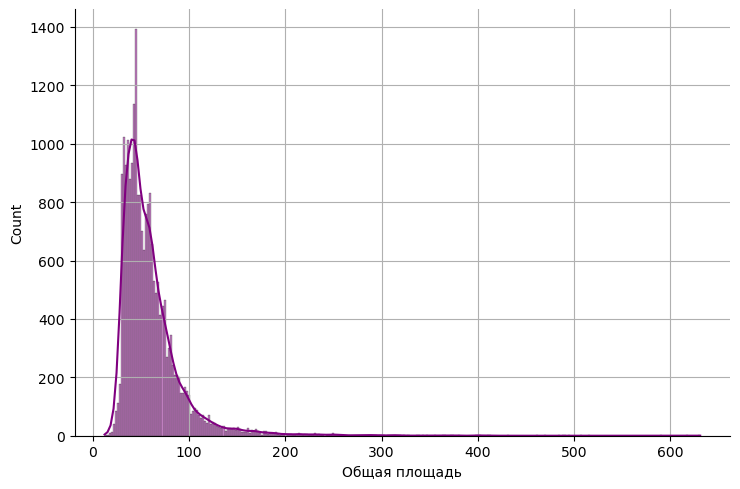

In [69]:
# data.hist('total_area', bins=50, figsize=(10, 5), color='purple', edgecolor='navy', alpha=0.7)
# plt.grid(True)
# plt.xlabel('Общая площадь')
# plt.show()
sns.displot(data, x='total_area', kde=True, color='purple', alpha=0.5,  height= 5 , aspect= 1.5)
plt.grid(True)
plt.xlabel('Общая площадь')
plt.show()

In [70]:
data['total_area'].describe()

count    21686.00000
mean        60.03035
std         34.22848
min         12.00000
25%         40.00000
50%         52.00000
75%         69.50000
max        631.20000
Name: total_area, dtype: float64

(0.0, 120.0)

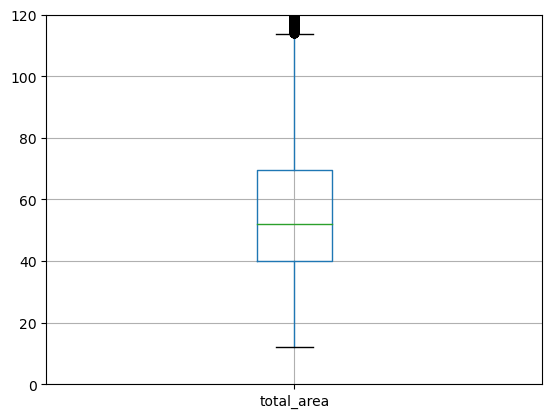

In [71]:
data.boxplot('total_area')
plt.ylim(0, 120)

Обратим внимание на то, что для общей площади довольно большое расхождение между средним и медианным значением. Это объясняется тем, что справа есть большой хвост очень высоких значений площади (например частные загородные дома или более редкие квартиры премиум класса). Об этом же свидетельствует высокое стандартное отклонение. Нормальные значения общей площади расположены между 12 и 115 м кв. Попробуем отсечь хвост и ещё раз взглянем на медианное и среднее значение и на гистограмму.

In [72]:
data.query('total_area <= 115')['total_area'].describe(), \
data.query('total_area > 115')['total_area'].count() / data['total_area'].count()

(count    20604.000000
 mean        54.400563
 std         19.423233
 min         12.000000
 25%         39.300000
 50%         50.100000
 75%         65.700000
 max        115.000000
 Name: total_area, dtype: float64,
 0.049893940791293924)

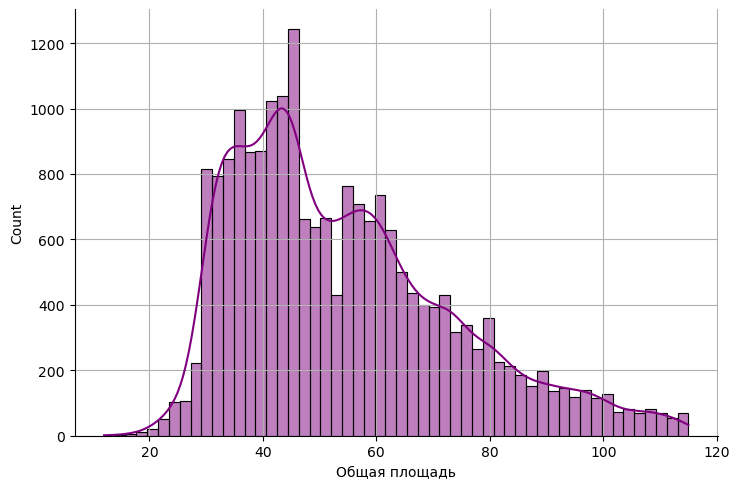

In [73]:
sns.displot(data.query('total_area <= 115'), x='total_area', kde=True, color='purple', alpha=0.5,  height= 5 , aspect= 1.5)
plt.grid(True)
plt.xlabel('Общая площадь')
plt.show()

**Вывод:**

Нормальные значения общей площади расположены в промежутке от 12 до 115 м кв. Наиболее распространенно значение в 52 мкв, что соответсвует 2-х комнатной квартире. Минимум составляет 12м кв., максимум 632 м кв. Для корректной работы необходимо отсечь значения за пределами 115 м кв. что составит 5% от общего количества.

##### Жилая площадь

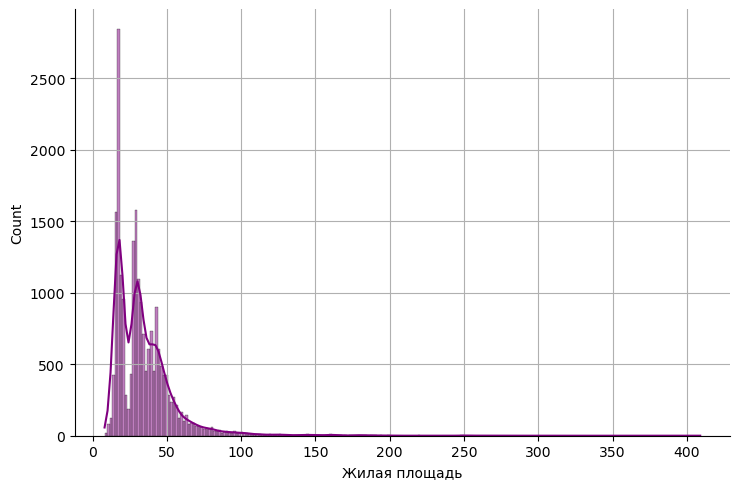

In [74]:
# data.hist('living_area', bins=115, figsize=(15, 5), color='green', edgecolor='blue', range=(0, 115))
# plt.grid(True)
# plt.xlabel('Жилая площадь')

sns.displot(data, x='living_area', kde=True, color='purple', alpha=0.5, height= 5 , aspect= 1.5)
plt.grid(True)
plt.xlabel('Жилая площадь')
plt.show()

In [75]:
data['living_area'].describe()

count    21686.000000
mean        34.451532
std         21.895947
min          8.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.000000
Name: living_area, dtype: float64

(0.0, 100.0)

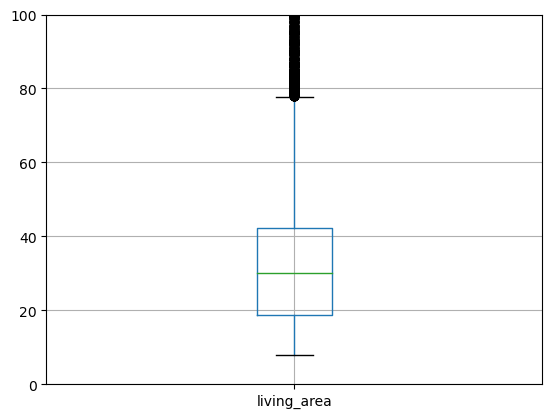

In [76]:
data.boxplot('living_area')
plt.ylim(0, 100)

Большая часть значений жилой площади расположены в промежутке от 2 до 79 м кв. Наиболее распространенно значение в 30 мкв. Это также соответсвует 2-х комнатной квартире. Как и в случае с общей площадью справа длинный хвост высоких значений. Однако для жилой площади мы также видим характерные "всплески" в районе 18, 30, 45 м кв. Это стандартные значения для типовых 1, 2, 3-х комнатных квартир, которых большинство.
Стандартное отклонение также очень велико. отсечём хвост, чтобы оставить только нормальные значения.

In [77]:
data.query('living_area <= 79')['living_area'].describe(), \
data.query('living_area > 79')['living_area'].count() / data['living_area'].count()

(count    20956.000000
 mean        31.644452
 std         14.059998
 min          8.000000
 25%         18.400000
 50%         30.000000
 75%         41.000000
 max         79.000000
 Name: living_area, dtype: float64,
 0.0336622705893203)

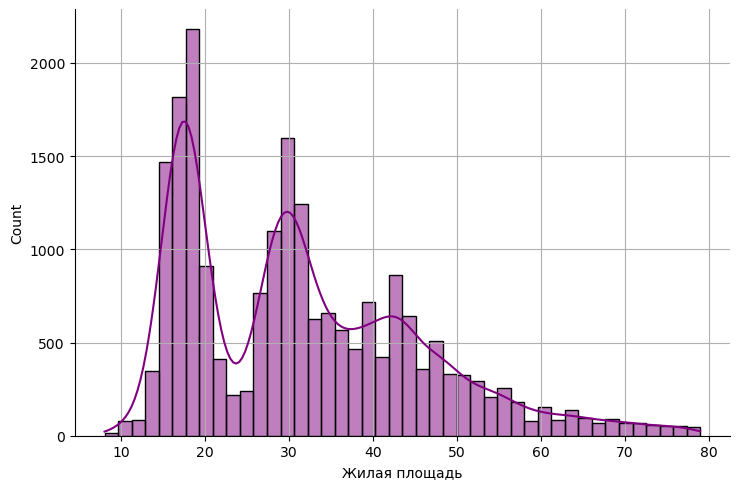

In [78]:
sns.displot(data.query('living_area <= 79'), x='living_area', kde=True, color='purple', alpha=0.5,  height= 5 , aspect= 1.5)
plt.grid(True)
plt.xlabel('Жилая площадь')
plt.show()

**Вывод:**

Большая часть значений жилой площади расположены в промежутке от 8 до 79 м кв. Наиболее распространенно значение в 30 мкв. Это также соответсвует 2-х комнатной квартире. Как и в случае с общей площадью мы отсекли длинный хвост справа, что составило лишь 3% от общего количества. Для жилой площади мы также видим характерные "всплески" в районе 18, 30, 45 м кв. Это стандартные значения для типовых 1, 2, 3-х комнатных квартир, которых большинство. Минимальное значение - 8 м кв., максимальное - 409м кв.

##### Площадь кухни

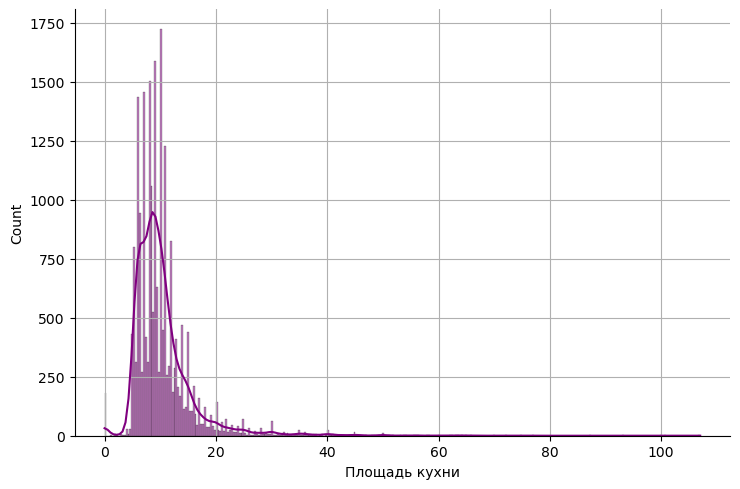

In [79]:
# data.hist('kitchen_area', bins=100, figsize=(10, 5), color='green', edgecolor='blue')
# plt.grid(True)
# plt.xlabel('Площадь кухни')

sns.displot(data, x='kitchen_area', kde=True, color='purple', alpha=0.5, height= 5 , aspect= 1.5)
plt.grid(True)
plt.xlabel('Площадь кухни')
plt.show()

In [80]:
data['kitchen_area'].describe()

count    21686.000000
mean        10.384868
std          5.783324
min          0.000000
25%          7.000000
50%          9.000000
75%         11.800000
max        107.000000
Name: kitchen_area, dtype: float64

(0.0, 20.0)

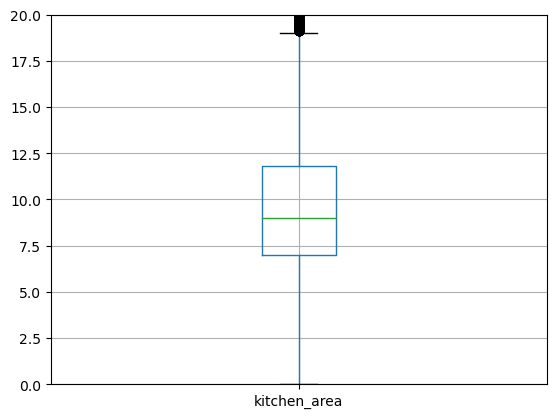

In [81]:
data.boxplot('kitchen_area')
plt.ylim(0, 20)

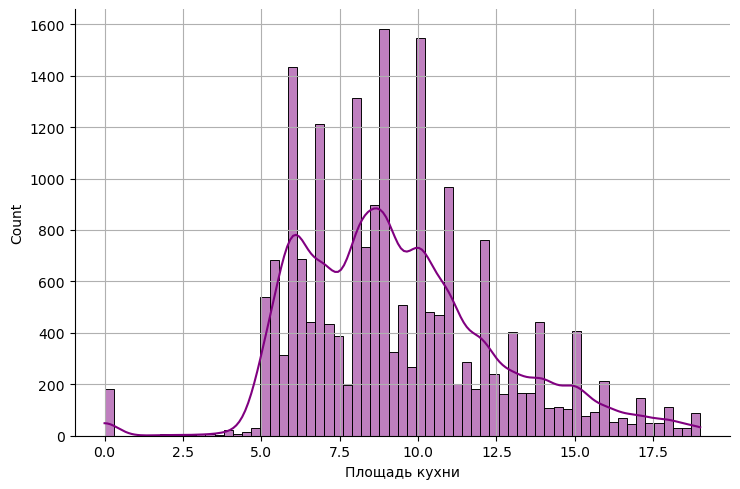

In [82]:
sns.displot(data.query('kitchen_area <= 19'), x='kitchen_area', kde=True, color='purple', alpha=0.5, height= 5 , aspect= 1.5)
plt.grid(True)
plt.xlabel('Площадь кухни')
plt.show()

In [83]:
data.query('kitchen_area > 19')['kitchen_area'].count() / data['kitchen_area'].count()

0.05478188693166098

**Выыод**
Большая часть значений столбца площади кухни расположены в промежутке от 0 до 19 м кв. Наиболее распространенно значение в 9 м кв. Типичное значение для многоквартирных домов. Также как и ранее мы видим "всплески" в районе 6, 8, 9, 10 м кв. - типичные значения для многоэтажек. Довольно много выбросов выше нормальных. Это скорее всего связано с нестандартной планировкой в частных домах или в дорогих объектах недвижимости. Что касается значений равных 0, то как мы выяснили ранее это связано с открытой планировкой, гда у кухни нет отдельной площади. Максимальное значение 107 м кв. Для корректной работы необходимо отсечь значения за пределами 19 м кв. что составит 5% от общего количества.

##### Цена объекта

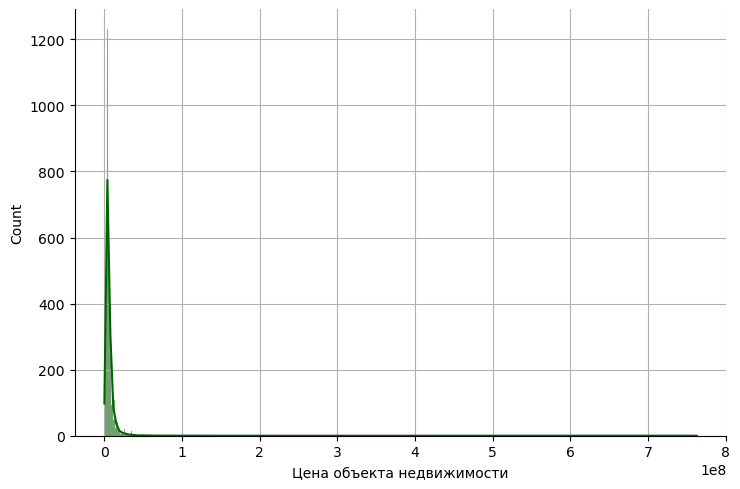

In [84]:
sns.displot(data, x='last_price', kde=True, color='darkgreen', alpha=0.5, height= 5 , aspect= 1.5)
plt.grid(True)
plt.xlabel('Цена объекта недвижимости')
plt.show()

Text(0.5, 0, 'Цена объекта недвижимости')

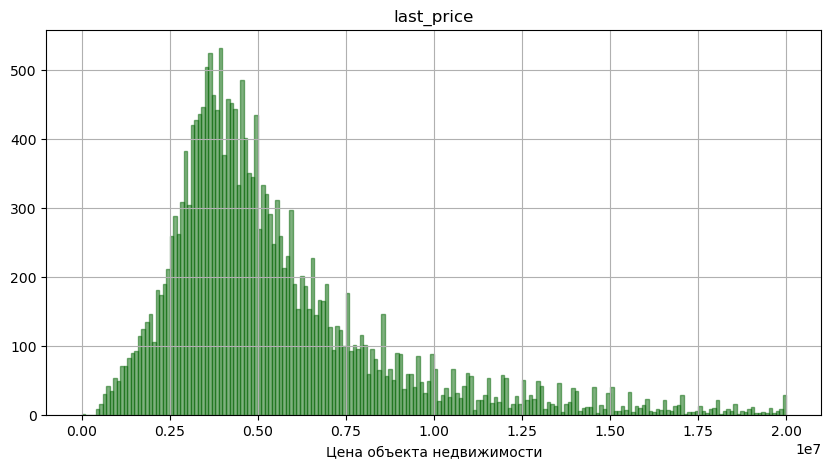

In [85]:
data.hist('last_price', bins=200, figsize=(10, 5), color='darkgreen', alpha=0.5, edgecolor='darkgreen', range=(0, 2e7))
plt.grid(True)
plt.xlabel('Цена объекта недвижимости')

In [86]:
data['last_price'].describe()

count    2.168600e+04
mean     6.478739e+06
std      1.051201e+07
min      1.219000e+04
25%      3.450000e+06
50%      4.650000e+06
75%      6.750000e+06
max      7.630000e+08
Name: last_price, dtype: float64

In [87]:
data.query('last_price > 12e6')['last_price'].count() / data['last_price'].count()

0.07940606843124597

(0.0, 12000000.0)

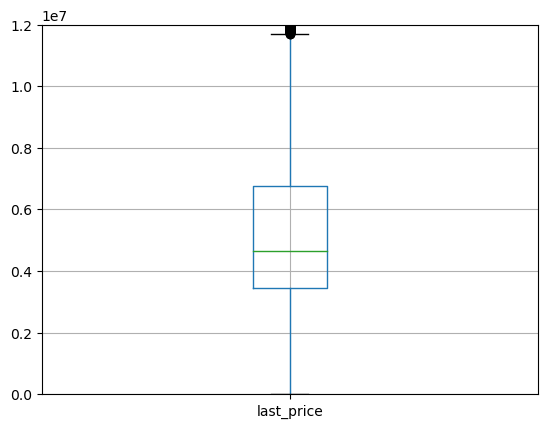

In [88]:
data.boxplot('last_price')
plt.ylim(0, 12e6)

In [89]:
# sns.violinplot(data=data, x='last_price', color='darkgreen')
# plt.xlabel('Цена объекта недвижимости')
# plt.show()

**Вывод:** Большая часть значений цены расположены в промежутке от 1,2 млн. до 12 млн. Наиболее распространенно значение в 4,65 млн. Как и раньше довольно много выбросов выше нормальных. В таблице есть много дорогих объектов. Распределение цены похоже на нормальное с длинным хвостом справа. Необходимо отсечь около 8 % значений.

<div class="alert-info" style="padding: 20px; border-radius: 10px">
<b> Пометка для ревьюера.

Кажется, что 8% это довольно существенно. Возможно не стоит ориентироваться на боксплот? Попробовал построить violinplot, но до конца с ним не разобралась. На вебинаре нам говорили, что violinplot лучше показывает распределения. Но я как-то не увидела разницы. Может надо как-то по-другому настроить?Подскажи, пожалуйста. </b>

##### Количество комнат

Text(0.5, 0, 'Количество комнат')

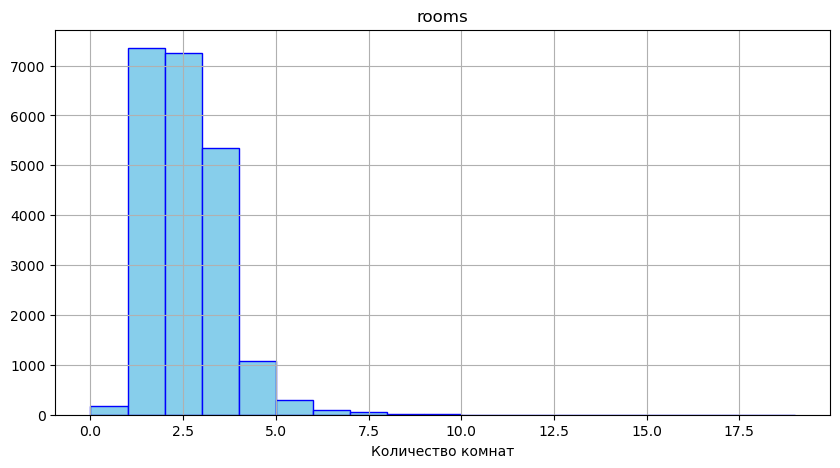

In [90]:
data.hist('rooms', bins=19, figsize=(10, 5), color='skyblue', edgecolor='blue')
plt.grid(True)
plt.xlabel('Количество комнат')

In [91]:
data['rooms'].describe()

count    21686.000000
mean         2.071475
std          1.078415
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

(0.0, 10.0)

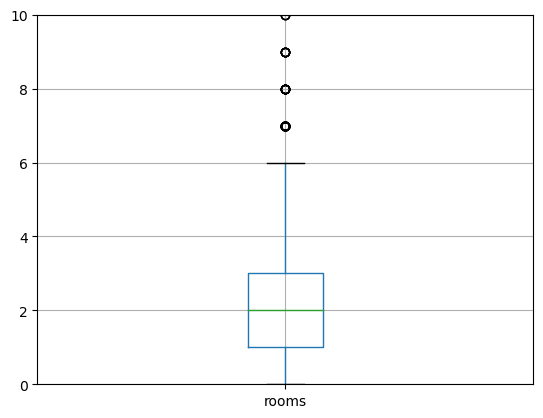

In [92]:
data.boxplot('rooms')
plt.ylim(0, 10)

**Вывод:** Всё верно: больше всего 2-х комнатных квартир. Нормальные значения расположены в промежутке от 0 до 6. Есть выбросы выше нормальных поэтому на гистограмме довольно длинный хвост справа. Значения равные 0 также встречаются в объектах со свободной планировкой или в 1-комнатных квартирах-студиях.

##### Высота потолков

In [93]:
data['ceiling_height'].describe()

count    21686.000000
mean         2.709255
std          0.263173
min          2.000000
25%          2.550000
50%          2.650000
75%          2.750000
max         14.000000
Name: ceiling_height, dtype: float64

Text(0.5, 0, 'Высота потолков')

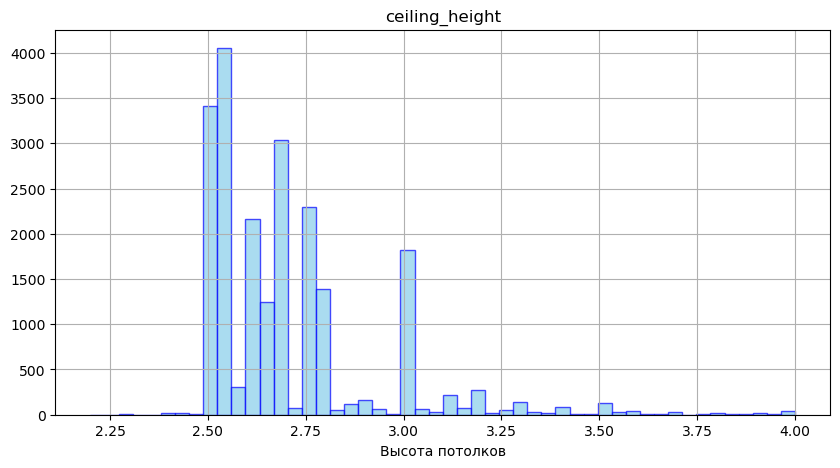

In [94]:
data.hist('ceiling_height', bins=50, range=(2.2, 4), figsize=(10, 5), color='skyblue', edgecolor='blue', alpha=0.7)
plt.grid(True)
plt.xlabel('Высота потолков')

(2.0, 3.5)

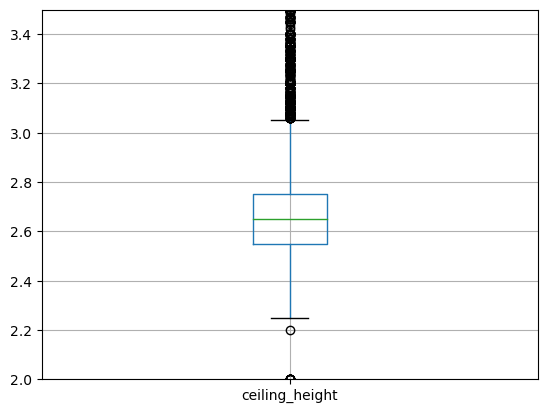

In [95]:
data.boxplot('ceiling_height')
plt.ylim(2, 3.5)

**Вывод:**

Видно, что большая часть значений лежит в диапазоне от 2.2 м до 3.1 м. Это соответсвует реальности. Типичная высота потолков 2,65 м. Как и для всех предыдущих параметров присутсуют выбросы значений. Тем не менее после того как мы исправили или удалили аномальные значения, разница между средним и медианым значением совсем небольшая. Стандартное отклонение также невелико.

##### Этаж квартиры

Text(0.5, 0, 'Этаж')

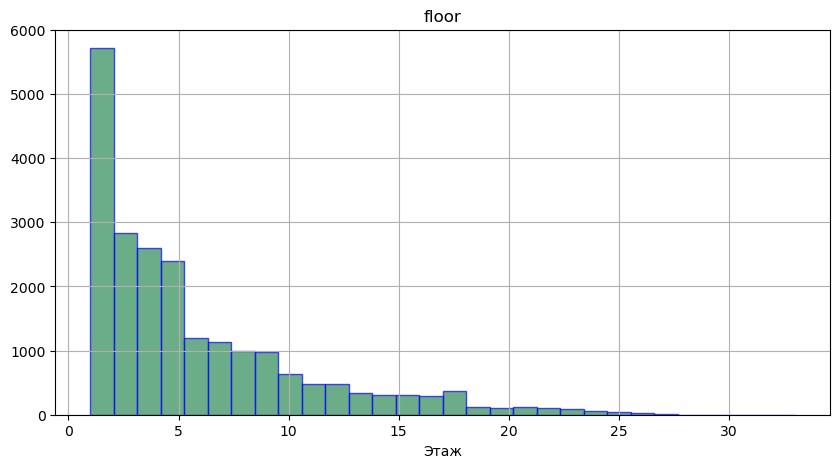

In [96]:
data.hist('floor', bins=30, figsize=(10, 5), color='seagreen', edgecolor='blue', alpha=0.7)
plt.grid(True)
plt.xlabel('Этаж')

In [97]:
data['floor'].describe()

count    21686.000000
mean         5.875035
std          4.851739
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

(1.0, 18.0)

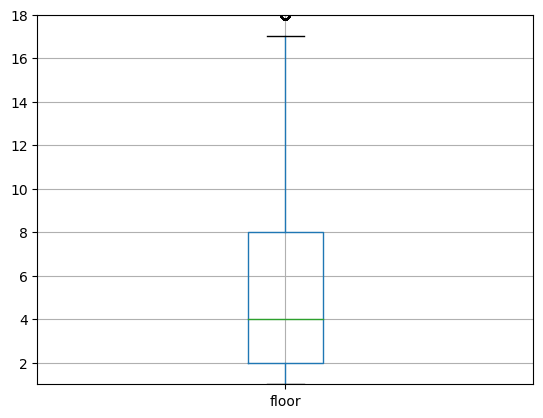

In [98]:
data.boxplot('floor')
plt.ylim(1, 18)

In [99]:
data[data['floor'] > 18]['floor'].count() / data['floor'].count()

0.03029604353038827

**Вывод:**

Оказалось, что чаще всего встречается 4-й этаж. Похоже на правду так как 4-й этаж есть в самых распространенных многоэтажных домах: 4, 5, 9 этажных. Большая часть значений лежит между 1 и 14 этажами. На гистограмме виден длинный хвост справа. Это нормально так как высотных домов не так много. Нормальное значения этажа лежит в пределах 1-18 этажей. Выше 18 этажей лишь 3% зданий.

##### Тип этажа квартиры («первый», «последний», «другой»)

In [100]:
data['floor_type'].value_counts()

другой       15957
последний     3073
первый        2656
Name: floor_type, dtype: int64

Text(0.5, 0, 'Тип этажа квартиры')

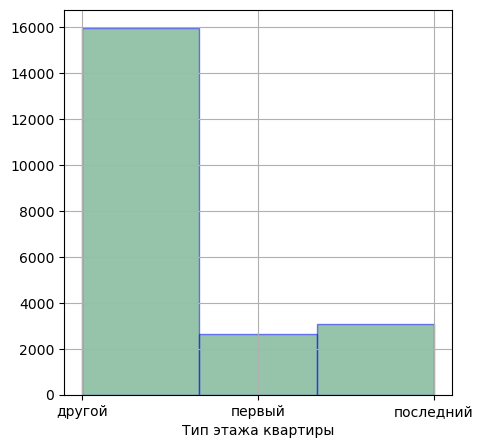

In [101]:
data['floor_type'].hist(bins=3, figsize=(5, 5), color='seagreen', alpha=0.5, edgecolor='blue')
plt.grid(True)
plt.xlabel('Тип этажа квартиры')

**Вывод**

Как и ожидалось больше всего строк со значением этажа "другой". Первых этажей меньше всего, так ка там чаще расположены нежидые помещения.

##### Общее количество этажей в доме

Text(0.5, 0, 'Общее количество этажей')

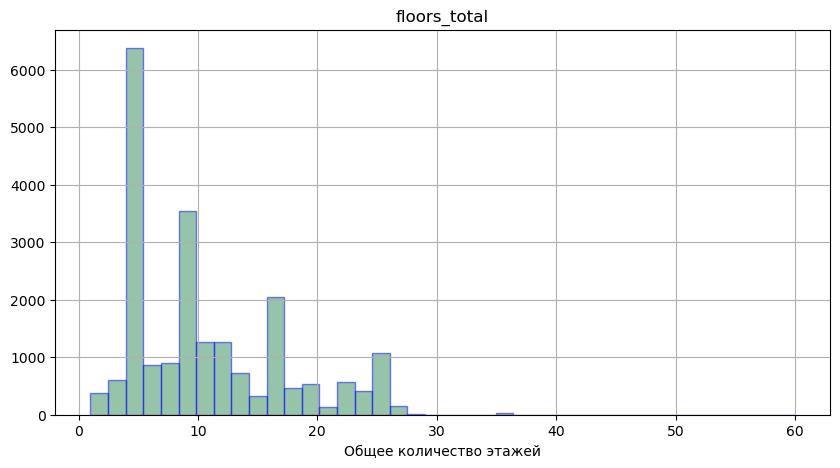

In [102]:
data.hist('floors_total', bins=40, figsize=(10, 5), color='seagreen', alpha=0.5, edgecolor='blue')
plt.grid(True)
plt.xlabel('Общее количество этажей')

In [103]:
data['floors_total'].describe()

count    21686.000000
mean        10.645439
std          6.563195
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

(1.0, 30.0)

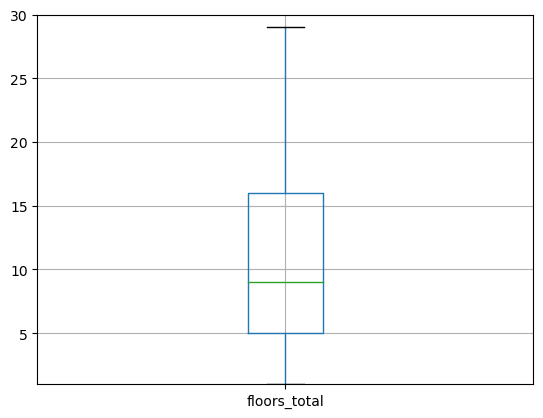

In [104]:
data.boxplot('floors_total')
plt.ylim(1, 30)

**Вывод:** Больше всего 9-этажных домов. Вполне ожидаемо. Также много 4-х этажных домов и выше. Это объясянет почему 4-й этаж самый распространённый. Большая часть значений лежит между 1 и 27 этажами. На гистограмме виден длинный хвост справа. Это нормально так как высотных домов не так много.

##### Расстояние до центра города в метрах

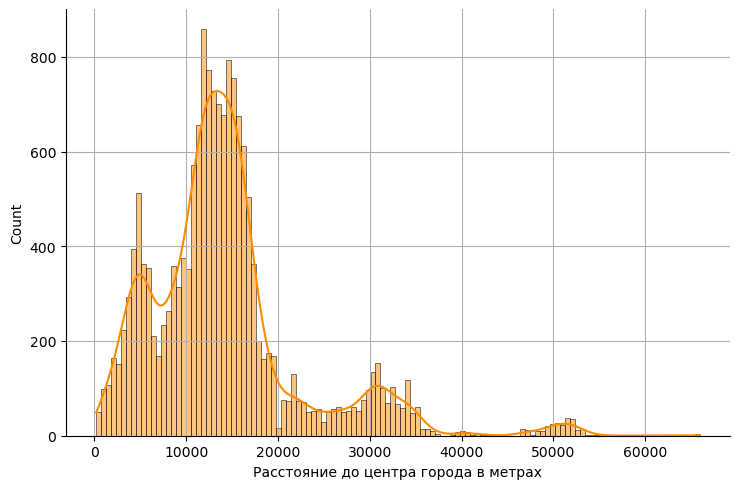

In [105]:
# data.hist('cityCenters_nearest', bins=100, figsize=(10, 5), color='green', edgecolor='blue')
# plt.grid(True)
# plt.xlabel('Расстояние до центра города в метрах')

sns.displot(data, x='cityCenters_nearest', kde=True, color='darkorange', alpha=0.5,  height= 5 , aspect= 1.5)
plt.grid(True)
plt.xlabel('Расстояние до центра города в метрах')
plt.show()

In [106]:
data['cityCenters_nearest'].describe()

count    16803.000000
mean     14241.676010
std       8673.048785
min        181.000000
25%       9304.000000
50%      13109.000000
75%      16268.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

(0.0, 30000.0)

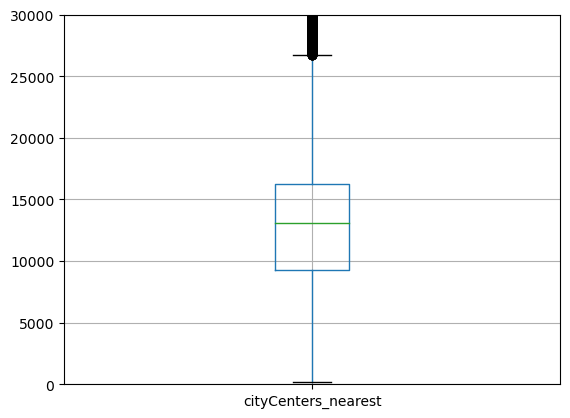

In [107]:
data.boxplot('cityCenters_nearest')
plt.ylim(0, 30000)

In [108]:
data[data['cityCenters_nearest'] > 27000]['cityCenters_nearest'].count() / data['cityCenters_nearest'].count()

0.09670892102600726

**Вывод:** 

Нормальные значения растояния до центра города расположены в промежутке от 180 до 27 000 м кв. Наиболее распространенно значение в 13 000 м.Максимум почти 66 км. Для корректной работы необходимо отсечь значения за пределами 27 км. что составит 9% от общего количества.

##### Расстояние до ближайшего аэропорта

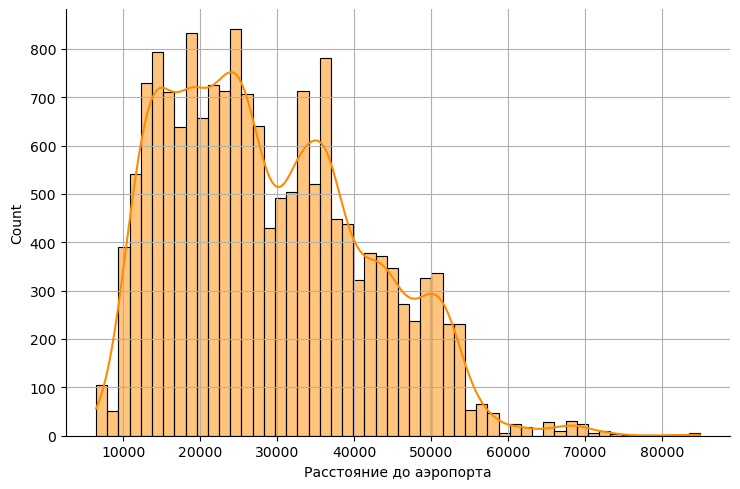

In [109]:
sns.displot(data, x='airports_nearest', kde=True, color='darkorange', alpha=0.5,  height= 5 , aspect= 1.5)
plt.grid(True)
plt.xlabel('Расстояние до аэропорта')
plt.show()

In [110]:
data['airports_nearest'].describe()

count    16782.000000
mean     28777.223871
std      12659.058326
min       6450.000000
25%      18516.000000
50%      26707.500000
75%      37242.000000
max      84869.000000
Name: airports_nearest, dtype: float64

(0.0, 80000.0)

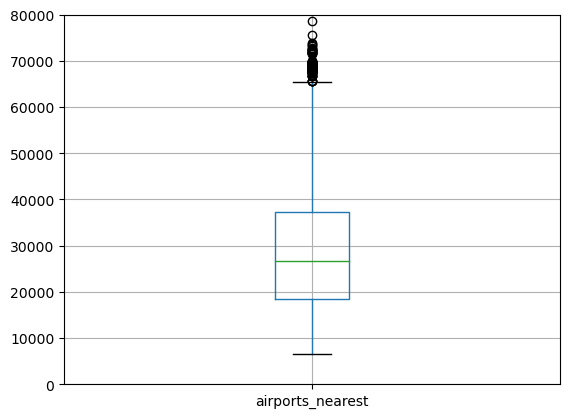

In [111]:
data.boxplot('airports_nearest')
plt.ylim(0, 80000)

**Вывод:**

Медианное значение растояния до аэропорта составляет 26,7 км. Основная часть значений находится между 6,5 и 65 км. Есть отдельные выбросы до почти 85 км. Ничего необычного.

##### Расстояние до ближайшего парка

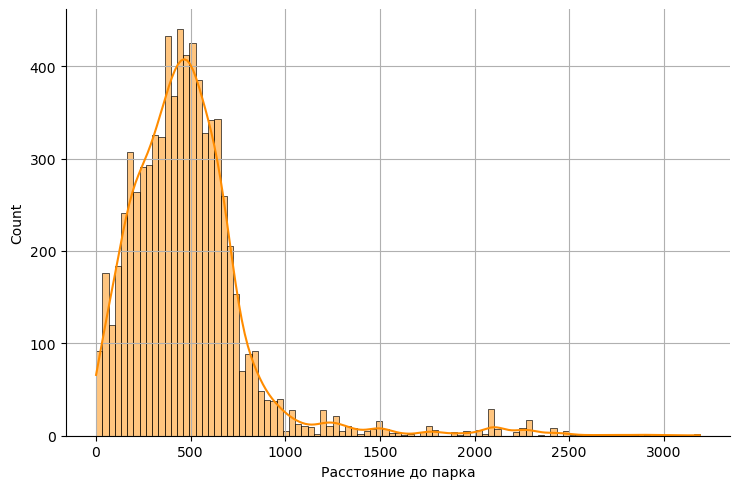

In [112]:
sns.displot(data, x='parks_nearest', kde=True, color='darkorange', alpha=0.5,  height= 5 , aspect= 1.5)
plt.grid(True)
plt.xlabel('Расстояние до парка')
plt.show()

In [113]:
data['parks_nearest'].describe()

count    7460.000000
mean      488.135255
std       338.302458
min         1.000000
25%       287.000000
50%       452.000000
75%       610.000000
max      3190.000000
Name: parks_nearest, dtype: float64

(0.0, 1500.0)

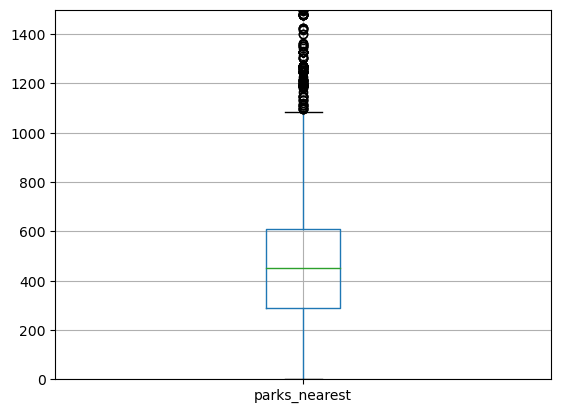

In [114]:
data.boxplot('parks_nearest')
plt.ylim(0, 1500)

**Вывод:** Медианное растояние до ближайшего парка 452 м. В основном значения располагаются в пределах 3-1000 м. На гистограмме виден длинный хвост справа, то есть есть отдельные выбросы. Но на самом деле эти данные не означают, что рядом с большинством жилых зданий есть парк в пешей доступности. В этом столбце очень много пропусков, которые невозможно заменить. Скорее стоит предположить, что для строк где таких данных нет, парки располагаются далеко.

##### День и месяц публикации объявления

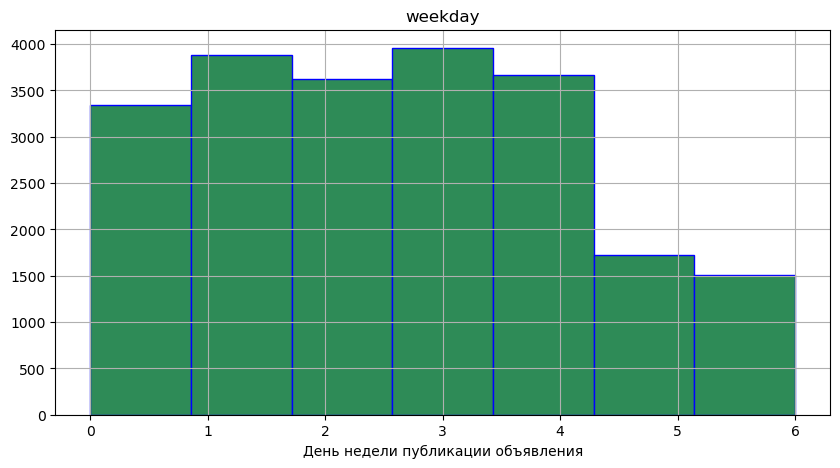

In [115]:
data.hist('weekday', bins=7, figsize=(10, 5), color='seagreen', edgecolor='blue')
plt.grid(True)
plt.xlabel('День недели публикации объявления')
plt.show()

In [116]:
# month_dictionary = {1: 'Январь', 2: 'Февраль', 3: 'Март', 4: 'Апрель', 5: 'Май', 6: 'Июнь', 7: 'Июль', 8: 'Август', 9: 'Сентябрь', 10: 'Октябрь', 11: 'Ноябрь', 12: 'Декабрь'}
# data_month_name = data.replace({'month': month_dictionary})
# data_month_name.head()
# data['month'].plot(kind='hist', bins=12)
# plt.axis(['Январь', 'Февраль', 'Март', 'Апрель', 'Май', 'Июнь', 'Июль', 'Август', 'Сентябрь', 'Октябрь', 'Ноябрь', 'Декабрь'])

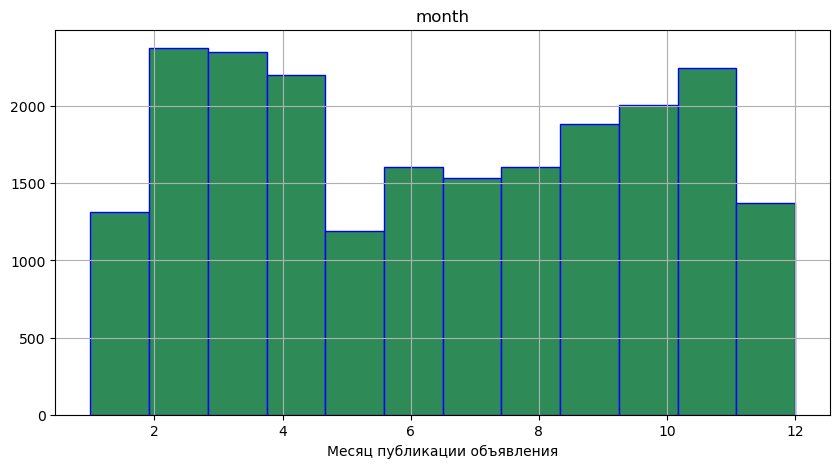

In [117]:
data.hist('month', bins=12, figsize=(10, 5), color='seagreen', edgecolor='blue')
plt.grid(True)
plt.xlabel('Месяц публикации объявления')
plt.show()

**Вывод:** По гистограмме видно, что больше всего объявлений публикуется по четвергам, а меньше всего в выходные. Меньше всего объявлений публикуется в декабре-январе, а также в летние месяцы и в мае. Что логично, так как в эти месяцы много праздничных дней и отпусков. Пик публикаций приходиться на ферваль-март, а также на осенние месяцы

##### Количество дней до продажи

In [118]:
data['days_exposition'].describe()

count    18710.000000
mean       184.801764
std        221.431449
min          1.000000
25%         44.000000
50%        101.000000
75%        238.000000
max       1580.000000
Name: days_exposition, dtype: float64

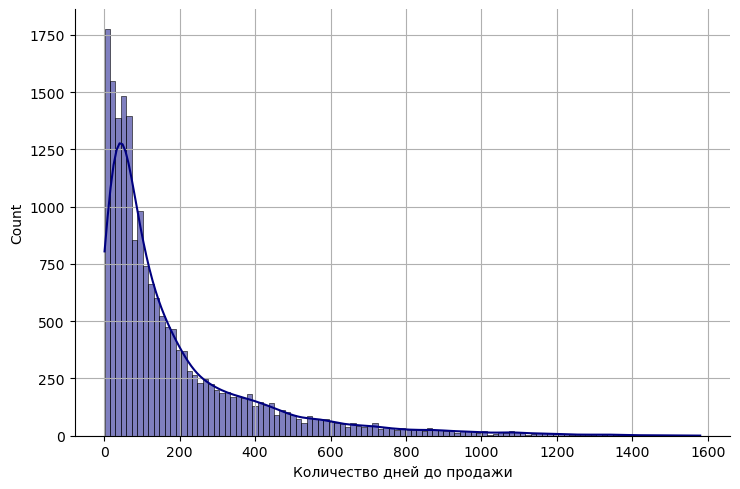

In [119]:
sns.displot(data, x='days_exposition', kde=True, color='navy', alpha=0.5,  height= 5 , aspect= 1.5)
plt.grid(True)
plt.xlabel('Количество дней до продажи')
plt.show()

Как мы видели ранее есть всплеск значений около 0. Эти значения могут быть случайными, но также возможно, что объявление не было снято с публицации, то есть оно всё ещё актуально. Если это предположение верно, то процент таких объявлений в более поздних годах должен быть выше. Посмотрим распределении по годам таких объявлений и их отношение к общему количеству объявлений по годам публикации.

In [120]:
'Количество пропущенных значений по годам:', data[data['days_exposition'].isna()]['year'].value_counts(), \
'Общее количество пропущенных значений по годам:', data['year'].value_counts(), \
'Доля пропущенных значений по годам:',data[data['days_exposition'].isna()]['year'].value_counts() / data['year'].value_counts(), \
'Доля пропущенных значений:', data[data['days_exposition'].isna()]['year'].count() / data['year'].count()

('Количество пропущенных значений по годам:',
 2019    1673
 2018     902
 2017     252
 2016      66
 2015      65
 2014      18
 Name: year, dtype: int64,
 'Общее количество пропущенных значений по годам:',
 2017    7639
 2018    7497
 2019    2682
 2016    2638
 2015    1101
 2014     129
 Name: year, dtype: int64,
 'Доля пропущенных значений по годам:',
 2014    0.139535
 2015    0.059037
 2016    0.025019
 2017    0.032989
 2018    0.120315
 2019    0.623788
 Name: year, dtype: float64,
 'Доля пропущенных значений:',
 0.137231393525777)

Действительно, процент таких объявлений увеличивается начиная с 2016 года. Что касается значений 2014-2015 годов, то данных за эти годы очень мало и ими можно пренебречь.
Тем не менее заполнить пропуски в данном столбце невозможно. Оставим их как есть.

In [121]:
data['days_exposition'].describe()

count    18710.000000
mean       184.801764
std        221.431449
min          1.000000
25%         44.000000
50%        101.000000
75%        238.000000
max       1580.000000
Name: days_exposition, dtype: float64

(0.0, 600.0)

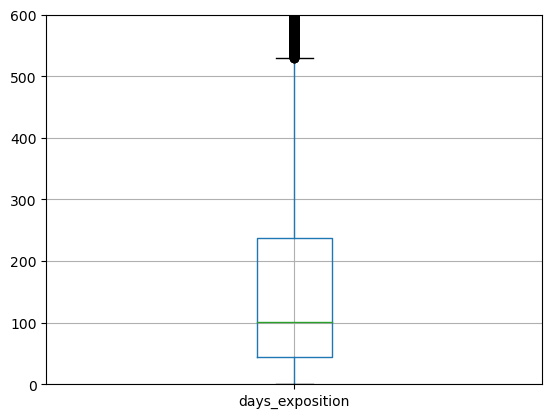

In [122]:
data.boxplot('days_exposition')
plt.ylim(0, 600)

In [123]:
data[data['days_exposition'] > 510]['days_exposition'].count() / data['days_exposition'].count()

0.08433992517370391

**Вывод:** В среднем объекты недвижимости продают за 95 дней. Быстрыми можно назвать продажи менее чем за 45 дней. Долгими можно считать сроки продажи более 231 дня. Большая часть значений укладывается в промежуток 1-510 дней, то есть до 1,5 лет. Значения выше этой границы будем считать выбросами. Видно большую разницу между средним и медианым значением. Это связано с тем, что в таблице много необычно больших значений: это видно и по длинному правому хвосту на гистограмме. 

##### Срез данных для дальнейших исследований

Сделаем срез датасета убрав из него значения выходящие за пределы нормы. Срез сделаем только по столбцам где нет пропусков, иначе потеряем слишком много значений.

In [124]:
good_data = data.query('(total_area <= 115) & \
                        (living_area <= 79) & \
                        (kitchen_area <= 19) & \
                        (rooms <= 6) & \
                        (last_price <= 12e6) & \
                        (2.2 <= ceiling_height <= 3.23) & \
                        (floors_total <= 27)')
good_data = good_data[good_data['floor'] <= 18]

len(good_data.index)

18361

#### Взаимосвязь разных факторов и полной стоимости объекта

##### Взаимосвязь общей площади и цены объекта

Посмотрим как влияет на общую стоимость площадь объекта. Предполагаем, что должна влиять в значительной степени. Предварительно удалим выбросы значений методом `query`.

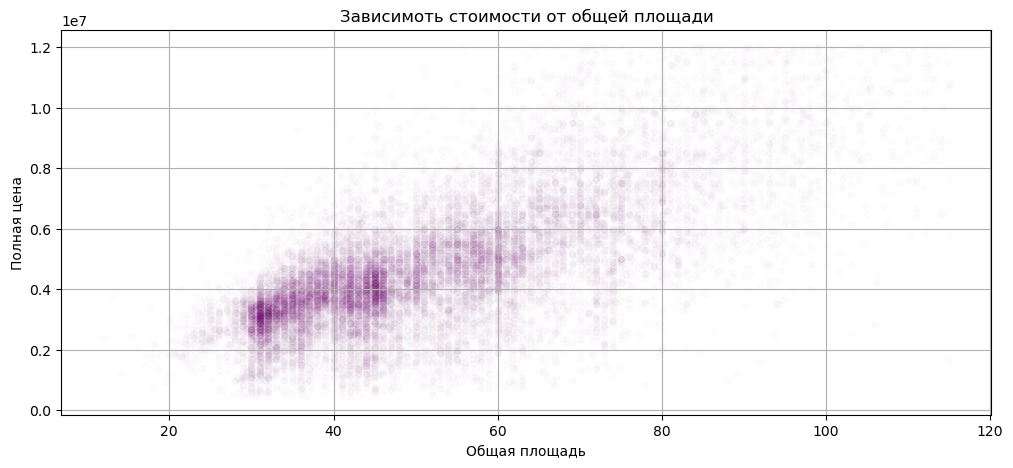

In [125]:
(
    data.query('index in @good_data.index')
       .plot(x='total_area', y='last_price', kind='scatter', color='purple', alpha=0.01, grid=(True), figsize=(12, 5))
)
plt.xlabel('Общая площадь')
plt.ylabel('Полная цена')
plt.title('Зависимоть стоимости от общей площади')
plt.show()

По диаграмме видно, что есть тенденция по увеличению цены при увеличении площади. Однако пятно довольно размыто из-за большого разброса цены для одной и той же площади. Попробуем сгруппировать строки по общей площади и вычислить медианную цену для каждого значения площади.

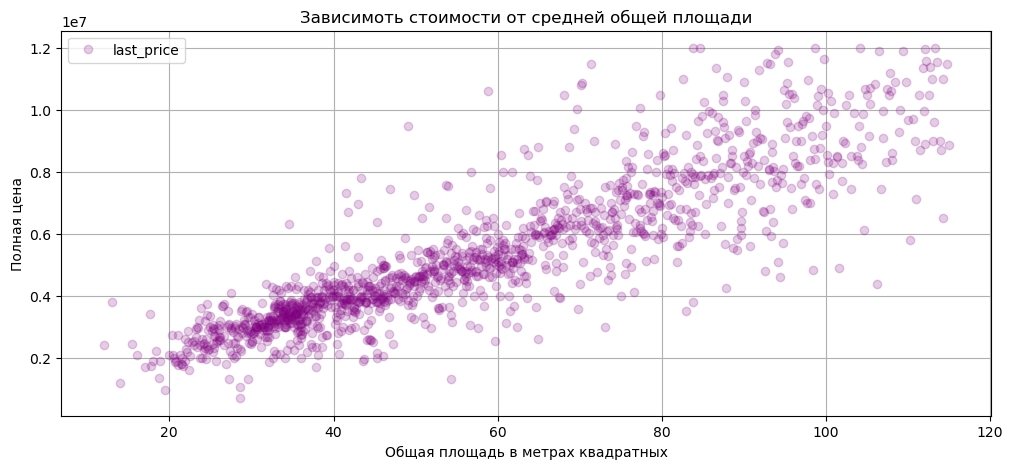

<Figure size 1200x500 with 0 Axes>

In [126]:
(
    data.query('index in @good_data.index')
    .pivot_table(index='total_area', values='last_price', aggfunc='median')
    .plot(color='purple', grid=(True), style='o', alpha=0.2, figsize=(12, 5))
)
plt.xlabel('Общая площадь в метрах квадратных')
plt.ylabel('Полная цена')
plt.title('Зависимоть стоимости от средней общей площади')
plt.figure(figsize=(12, 5))
plt.show()

Здесь уже хорошо видна положительная корреляция между общей площадью и ценой. Посчитам числовое значения корреляции методом `corr`.

In [127]:
(
    data.query('index in @good_data.index')['total_area']
    .corr(data.query('index in @good_data.index')['last_price'])
)

0.6914068820479178

**Вывод:**

Мы выяснили, что существует положительная корреляция между общей площадью и полной ценой объекта недвижимости. Корреляция равна 0.7 - это довльно много. Как мы и предполагали.

##### Взаимосвязь жилой площади и стоимости объекта.

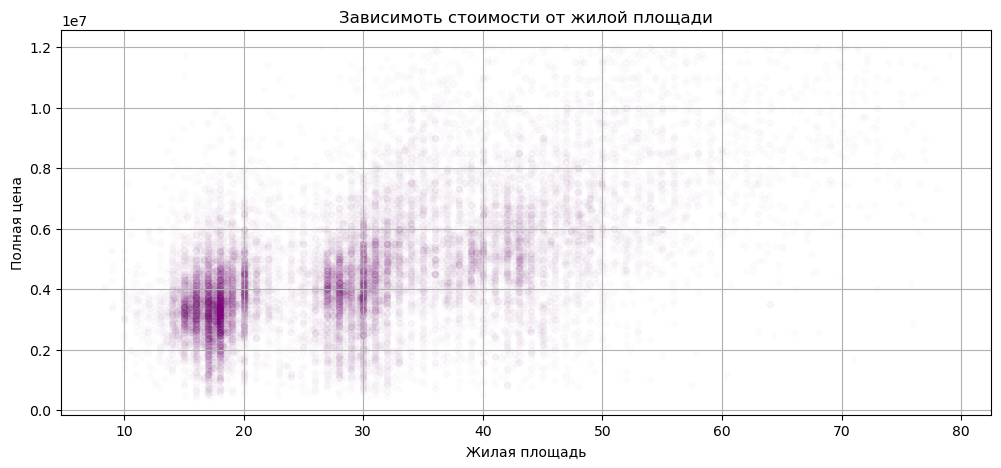

In [128]:
(
    data.query('index in @good_data.index')
       .plot(x='living_area', y='last_price', kind='scatter', color='purple', alpha=0.01, grid=(True), figsize=(12, 5))
)
plt.xlabel('Жилая площадь')
plt.ylabel('Полная цена')
plt.title('Зависимоть стоимости от жилой площади')
plt.show()

На диаграмме рассеивания хорошо видны скопления значений в районе 18, 30, 45 мкв. Это типичные значения жилой площади для соответсвенно 1, 2, 3 комнатных типовых квартир, которых большинство. Уже здесь неплохо видна тенденция к увеличению цены с увеличением жилой площади. Попробуем построить более понятный график сгруппировав данные по значениям жилой площади.

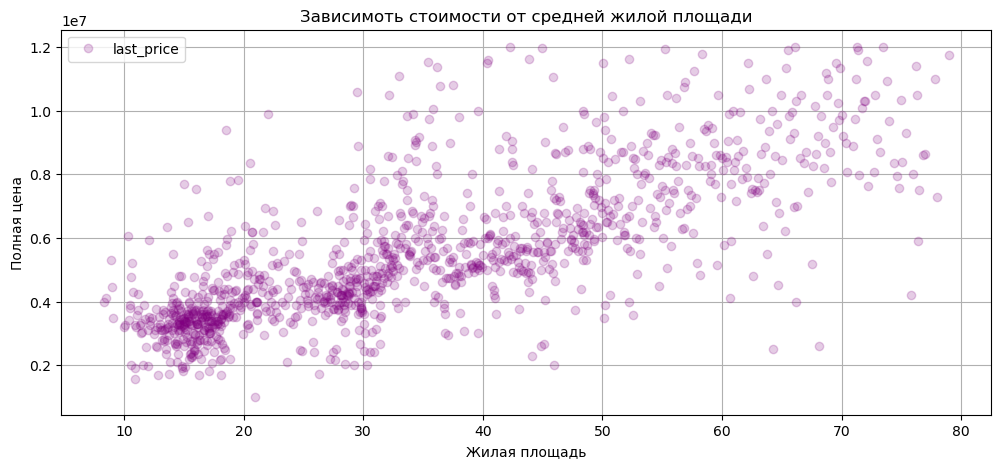

In [129]:
(
    data.query('index in @good_data.index')
    .pivot_table(index='living_area', values='last_price', aggfunc='median')
    .plot(color='purple', grid=(True), style='o', alpha=0.2, figsize=(12, 5))
)
plt.xlabel('Жилая площадь')
plt.ylabel('Полная цена')
plt.title('Зависимоть стоимости от средней жилой площади')
plt.show()

Здесь уже хорошо видна положительная корреляция между общей площадью и ценой. Посчитам числовое значения корреляции методом `corr`.

In [131]:
(
    data.query('(index in @good_data.index) & (last_price <= 12e6)')['living_area']
    .corr(data.query('index in @good_data.index')['last_price'])
)

0.5708071857757108

**Вывод:**

Мы вяснили, что существует положительная корреляция между жилой площадью и полной ценой объекта недвижимости. Корреляция равна 0.56 - это существенно. Как мы и предполагали.

##### Взаимосвязь площади кухни и стоимости объекта

In [ ]:
(
    data.query('index in @good_data.index')
       .plot(x='kitchen_area', y='last_price', kind='scatter', color='purple', alpha=0.01, grid=(True), figsize=(12, 5))
)
plt.xlabel('Площадь кухни')
plt.ylabel('Полная цена')
plt.title('Зависимоть стоимости от площади кухни')
plt.figure(figsize=(12, 5))
plt.show()

На диаграмме рассеивания хорошо видны скопления значений в районе 6, 7, 9, 10 мкв. Это также типичные значения площади кухни типовых квартир, которых большинство. Прослеживается тенденция к увеличению цены с увеличением площади кухни. Но это неочевидно. Попробуем построить график сгруппировав данные по значениям площади кухни.

In [ ]:
data_by_kitchen_area = (
    data.query('index in @good_data.index')
    .pivot_table(index='kitchen_area', values='last_price', aggfunc='median')
    .plot(color='purple', grid=(True), style='o', alpha=0.2, figsize=(12, 5))
)
plt.xlabel('Площадь кухни')
plt.ylabel('Полная цена')
plt.title('Зависимоть стоимости от средней площади кухни')
plt.show()

In [ ]:
(
    data.query('index in @good_data.index')['kitchen_area']
    .corr(data.query('index in @good_data.index')['last_price'])
)

**Вывод:**

Мы вявили положительную корреляцию между площадью кухни и полной ценой объекта недвижимости. Корреляция равна 0.46. Это гораздо меньше чем корреляция общей или жилой площади с ценой. Что логично. С одной стороны просторная кухня добавляет метраж к общей площади квартиры, также часто в более дорогих и больших квартирах и кухни больше. Но, с другой стороны в большинстве случаев кухня одна, в отличие от жилых комнат. И даже если она достаточна велика, её влияние на общий метраж и следовательно стоимость ниже.

##### Взаимосвязь количества комнат и стоимости объекта

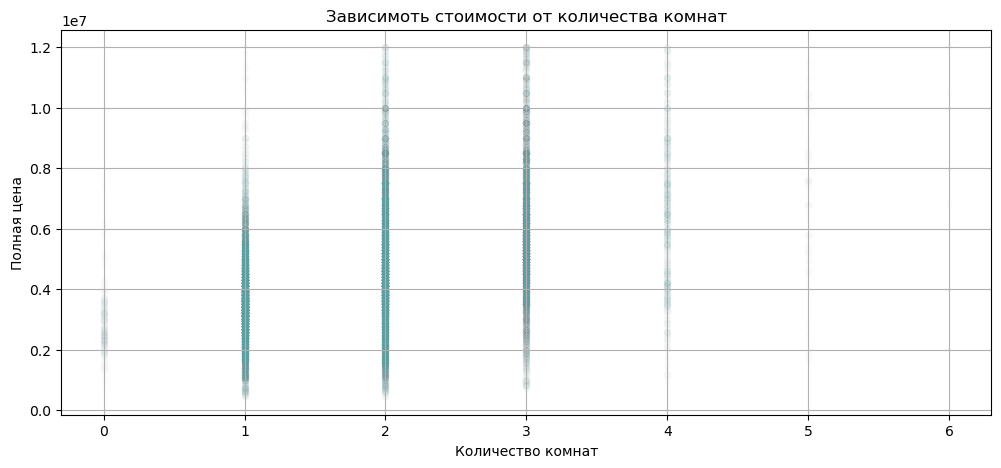

In [132]:
(
    data.query('index in @good_data.index')
       .plot(x='rooms', y='last_price', kind='scatter', color='cadetblue', alpha=0.01, grid=(True), figsize=(12, 5))
)
plt.xlabel('Количество комнат')
plt.ylabel('Полная цена')
plt.title('Зависимоть стоимости от количества комнат')
plt.show()

<div class="alert-info" style="padding: 20px; border-radius: 10px">
<b> **Пометка для ревьюера**

В ячейке ниже, почему-то повёрнуты подписи столбцов. Хотела исправить это при помощи `plt.xticks(rotation=0)`, но не работает. </b>

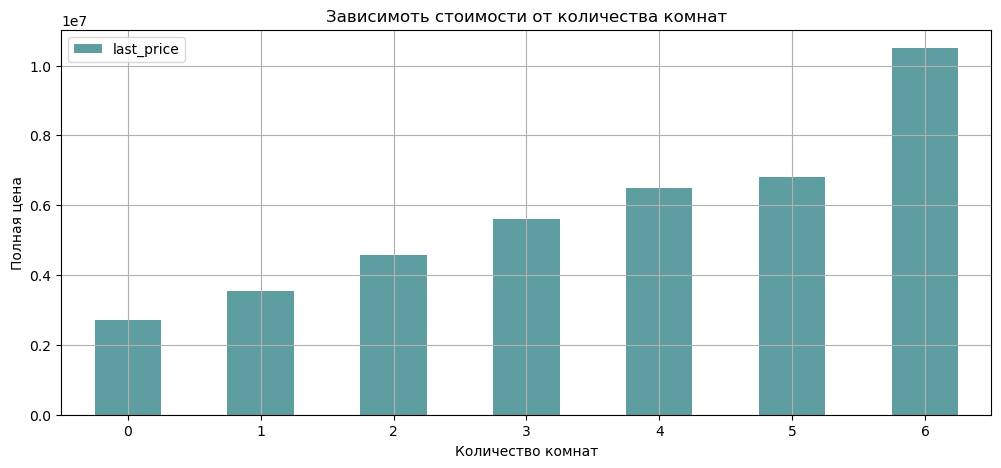

In [133]:
(
    data.query('index in @good_data.index')
    .pivot_table(index='rooms', values='last_price', aggfunc='median')
    .plot(kind='bar', color='cadetblue', figsize=(12, 5), grid=True)             
)
plt.xlabel('Количество комнат')
plt.ylabel('Полная цена')
plt.title('Зависимоть стоимости от количества комнат')
plt.xticks(rotation=0)
plt.show()

In [134]:
(
    data.query('index in @good_data.index')['rooms']
    .corr(data.query('index in @good_data.index')['last_price'])
)

0.4409649452364164

**Вывод:**

Мы также вявили положительную корреляцию между количестовм комнат и полной ценой объекта недвижимости. Корреляция равна 0.43. Это похоже на правду: чем больше комнат, тем дороже.

##### Взаимосвязь типа этажа и стоимости объекта

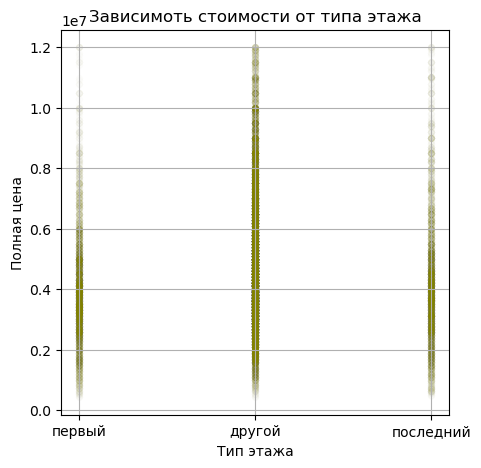

In [135]:
(
    data.query('index in @good_data.index')
       .plot(x='floor_type', y='last_price', kind='scatter', color='olive', alpha=0.01, grid=(True), figsize=(5, 5))
)
plt.xlabel('Тип этажа')
plt.ylabel('Полная цена')
plt.title('Зависимоть стоимости от типа этажа')
plt.show()

Очевидно, что данных о промежуточных этажах больше всего, и цена на них выше. Представим данные более наглядно. Построим столбчатую диаграмму на основании медианной стоимости для каждого типа этажа.

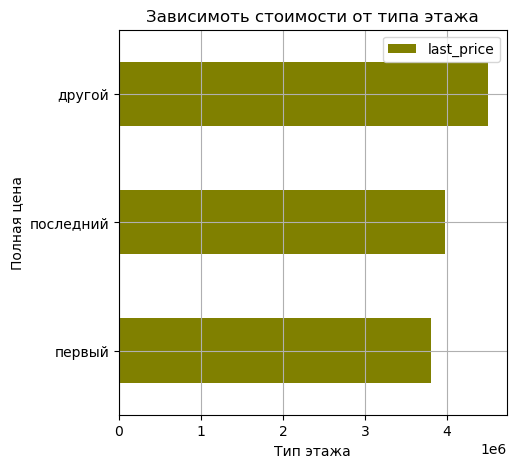

In [136]:
(
    data.query('index in @good_data.index')
    .pivot_table(index='floor_type', values='last_price', aggfunc='median')
    .sort_values(by='last_price')
    .plot(kind='barh', color='olive', grid=(True), figsize=(5, 5))
)
plt.xlabel('Тип этажа')
plt.ylabel('Полная цена')
plt.title('Зависимоть стоимости от типа этажа')
plt.show()

**Вывод:**

Судя по графику меньше всего ценятся первые этаже, чуть больше последние, и дороже всего стоят другие этажи.

##### Взаимосвязь дня публикации и стоимости объекта 

<div class="alert-info" style="padding: 20px; border-radius: 10px">
<b> **Пометка для ревьюера**

В ячейке ниже, хотела на графике заменить названия столбцов на дни недели. Попыталась использовать такой код `Axes.set_xticks(['Понедельник', 'Вторник', 'Среда', 'Четверг', 'Пятница', 'Суббота', 'Воскресенье'])`. Но не получилось. Подскажи, пожалуйста, как это сделать. </b>

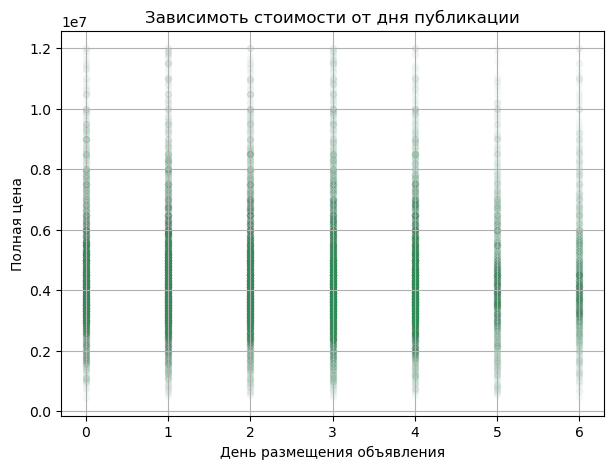

In [137]:
#data.plot(x='weekday', y='last_price', kind='scatter', xlim=(-1, 7), ylim=(0, 3e7), alpha=0.01, figsize=(10, 5),)
(
    data.query('index in @good_data.index')
       .plot(x='weekday', y='last_price', kind='scatter', color='seagreen', alpha=0.01, grid=(True), figsize=(7, 5))
)
plt.xlabel('День размещения объявления')
plt.ylabel('Полная цена')
plt.title('Зависимоть стоимости от дня публикации')
plt.show()

Видно только, что в выходные публикуется меньше объявлений. Построим график на основе медианной цены соответсвующей каждому дню недли который.

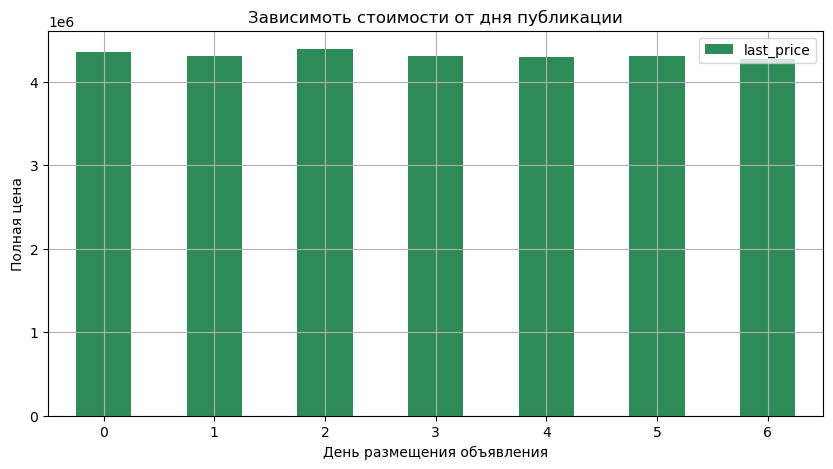

In [138]:
(
    data.query('index in @good_data.index')
    .pivot_table(index='weekday', values='last_price', aggfunc='median')
    .plot(kind='bar', color='seagreen', figsize=(10, 5))
)
plt.grid(True)
plt.xticks(rotation=0)
plt.xlabel('День размещения объявления')
plt.ylabel('Полная цена')
plt.title('Зависимоть стоимости от дня публикации')
plt.show()

**Вывод:**

Судя по графику цена продажи не зависит от дня недели размещения объявления.

##### Взаимосвязь месяца публикации и стоимости объекта 

<div class="alert-info" style="padding: 20px; border-radius: 10px">
<b> **Пометка для ревьюера**

Опять не получилось заменить номера месяцев на названия методом `xticks`. Пришлось создавать отдельную таблицу( чтоб не портить основную), в которой заменила номера на названия месяцев. Но не смогла отсортировать их по порядку. Сортируется естественно по алфавиту. </b>

In [139]:
# month_dictionary = {1: 'Январь', 2: 'Февраль', 3: 'Март', 4: 'Апрель', 5: 'Май', 6: 'Июнь', 7: 'Июль', 8: 'Август', 9: 'Сентябрь', 10: 'Октябрь', 11: 'Ноябрь', 12: 'Декабрь'}
# data_month_name = data.replace({'month': month_dictionary})

# pd.set_option('display.max_columns', 28)
# data_month_name.head()

In [140]:
# (
#     data_month_name.query('index in @good_data.index')
#        .pivot_table(index='month', values='last_price', aggfunc='median')
#        .plot(x='month', y='last_price', kind='scatter', color='seagreen', alpha=0.01, grid=(True), figsize=(10, 5), xticks=['Январь', 'Февраль', 'Март', 'Апрель', 'Май', 'Июнь', 'Июль', 'Август', 'Сентябрь', 'Октябрь', 'Ноябрь', 'Декабрь'])
# )
# plt.xlabel('Месяц размещения объявления')
# plt.ylabel('Полная цена')
# plt.title('Зависимоть стоимости от месяца публикации')
# plt.xticks(rotation=45)
# plt.show()

Поскольку в предыдущем пункте исследования 4.1.13 мы выяснили, что количество публикаций объявлений каждый месяц много построим сразу диаграмму, в которой посичтаем медианную стоимость для каждого месяца.

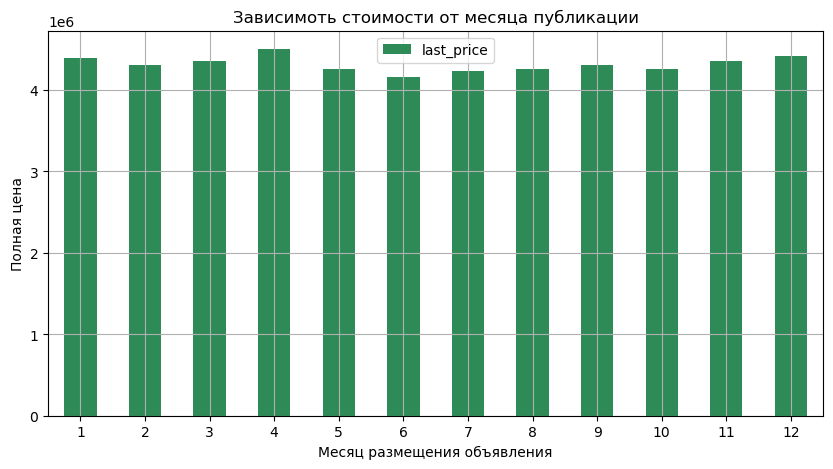

In [141]:
(
    data.query('index in @good_data.index')
    .pivot_table(index='month', values='last_price', aggfunc='median')
    .plot(kind='bar', color='seagreen', grid=(True), figsize=(10, 5))
)
plt.xlabel('Месяц размещения объявления')
plt.ylabel('Полная цена')
plt.title('Зависимоть стоимости от месяца публикации')
plt.xticks(rotation=0)
plt.show()

**Вывод:**

Судя по графику цена продажи не зависит от месяца публикации объявления.

##### Взаимосвязь года публикации и стоимости объекта 

Исследуем зависимость полной цены объекта от года публикации объявления. Для этого построим диаграмму рассеяния предварительно исключив выбросы (значения выше нормальных).

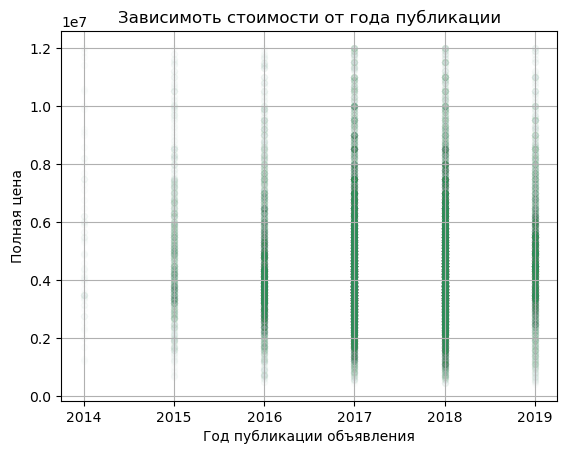

<Figure size 1200x500 with 0 Axes>

In [142]:
(
    data.query('index in @good_data.index')
       .plot(x='year', y='last_price', kind='scatter', color='seagreen', alpha=0.01, grid=(True)) #, ylim=(0, 2e7)
)
plt.xlabel('Год публикации объявления')
plt.ylabel('Полная цена')
plt.title('Зависимоть стоимости от года публикации')
#plt.xticks(rotation=45)
plt.figure(figsize=(12, 5))
plt.show()

#data.plot(x='year', y='last_price', kind='scatter', ylim=(0, 3e7), alpha=0.01, figsize=(10, 5)) #, xlim=(-1, 7)

По диаграмме видно, что объявлений 2014-2015 годов публикации крайне мало. Начиная с 2016 года объявлений становится гораздо больше, однако, из-за количества точек непонятно какая динамика у общей цены объектов.

Представим данные в форме графика, сгруппировав предварительно значения по годам. Посчитаем медианное значение полной стоимости и представим его на графике. Но, сначала посмотрим какую долю в общем количестве объявлений занимают объявления 2014-2015 годов.

In [143]:
data['year'].value_counts() / data['year'].count()

2017    0.352255
2018    0.345707
2019    0.123674
2016    0.121645
2015    0.050770
2014    0.005949
Name: year, dtype: float64

Объявления 2014-2015 годов это менее 1% всех объявлений. Уберём эти строки, чтобы они не искажали график.

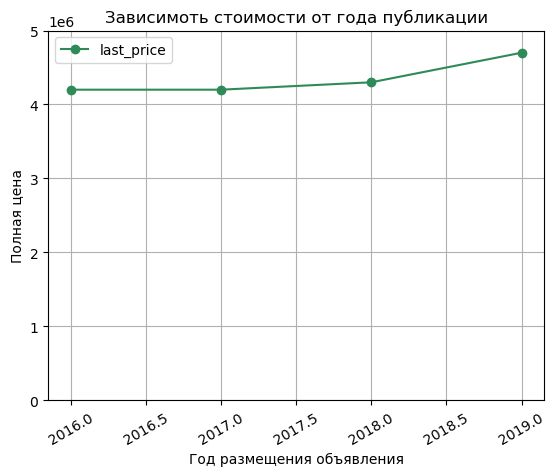

In [144]:
(
    data.query('index in @good_data.index')
    .pivot_table(index='year', values='last_price', aggfunc='median')
    .query('index not in [2014, 2015]')
    .plot( color='seagreen', grid=(True), ylim=(0, 5e6), marker='o', )
)
plt.xlabel('Год размещения объявления')
plt.ylabel('Полная цена')
plt.title('Зависимоть стоимости от года публикации')
plt.xticks(rotation=30)
plt.show()

<div class="alert-info" style="padding: 20px; border-radius: 10px">
<b> **Пометка для ревьюера**

Не уверена корректно ли вообще считать корреляцию для года. </b>

In [145]:
(
    data.query('(index in @good_data.index) & (year not in [2014, 2015])')['year']
    .corr(data.query('index in @good_data.index')['last_price'])
)

0.039160265489176754

**Вывод:**

По графику видно, что начиная с 2017 полная цена объектов недвижимости растёт.

####  Расчёт цены за метр квадратный в 10 населённых пунктах

Сгруппируем данные из таблицы по населённым пунктам, и посчитаем количество объявлений и медианное значение цены за мкв. в каждом населённом пункте. Отсортируем значения по количеству объявлений и оставим только первые 10 строк.

In [ ]:
top_10_locations = data.pivot_table(
    index='locality_name',
    values='price_per_meter', 
    aggfunc=['count','median']
)
top_10_locations.columns = ['Количество_объектов_на_продажу', 'Цена_за_мкв']
top_10_locations = top_10_locations.sort_values(by='Количество_объектов_на_продажу', ascending=False)[0:11]

top_10_locations = top_10_locations.sort_values(by='Цена_за_мкв', ascending=False)
top_10_locations

In [ ]:
top_10_locations.plot(y='Цена_за_мкв', kind='bar', figsize=(8, 8))

**Вывод**

Самая низная медианная стоимость метра квадратного в Выборге, а самая высокая разумеется в Санкт-Петербурге.

#### Расчёт "стоимости" километров в Петербурге.

Сделаем срез данных по Петербургу.

In [ ]:
(
    data.query('(index in @good_data.index) & (locality_name == "санкт-петербург")')
    .pivot_table(index='cityCenters_nearest_km', values='price_per_meter', aggfunc='mean')
                  )

In [ ]:
(
    data.query('(index in @good_data.index) & (locality_name == "санкт-петербург")')
    .pivot_table(index='cityCenters_nearest_km', values='price_per_meter', aggfunc='mean')
    .plot(color='seagreen', grid=(True))
)
plt.xlabel('Номер километрка от центра города')
plt.ylabel('Медианная цена за метр квадратный')
plt.title('Зависимость стоимости 1 м кв. и удалённости от центра города в км.')
plt.show()

In [ ]:
(
    data.query('(index in @good_data.index) & (locality_name == "санкт-петербург")')['cityCenters_nearest_km']
    .corr(data.query('(index in @good_data.index) & (locality_name == "санкт-петербург")')['price_per_meter'])
)

**Вывод**

На диаграмме видна тенденция к снижению цены за метр квадратный по мере удаления от центра города. Вполне ожидаемо. Этот вывод подтверждает также и отрицательный коэффициент корреляции -0,3.

### Общий вывод

Необходимо было выполнить предобработку данных на базе датасета о продаже квартир в Санкт-Петербурге и соседних населённых пунктах. Изучить их, чтобы найти особенности и зависимости, которые существуют на рынке недвижимости. По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных.

**1. Предобработка данных**

* Работа с пропущенными значениями

Были выявлены и заполнены пропуски в столбцах `is_apartment, balcony, parks_around3000, ponds_around3000`. Для столбцов `locality_name, floors_total` логическое заполнение пропусков было невозможно. Так как количество пропусков в этих столбцах невелико, мы избавились от строк с пропусками в этим столбцах.

Пропуски в `ceiling_height` были заполнены медианным значением согласно типу дома. Для категоризации была использована этажность дома, так как из представленных данных она наиболее точно отражает серию и характиристики дома.

В картографических данных также пропуски оставили. Скорее всего это технические ошибки при сборе информации из разных источников. Их исправить невозможно.

* Замена типов данных

Были заменены типы данных в следующих столбцах: `floors_total, balcony, parks_around3000, ponds_around3000` на целые числа. В столбце `first_day_exposition` тип данных заменили на datetime.

* Замена дубликатов

*Были обнаружены явные дубликаты. Удалены неочевидные дубликаты из столбца `locality_name`. Каждый населённый пункт был записан в одной единственной форме. Также названия всех населённых пунктов привели к нижнему регистру для окончательной проверки на явные дубликаты.

* Удаление аномальных значений

Были проверены столбцы с подозрительными значениями: `ceiling_height`, `living_area`, `kitchen_area`,  `rooms`, `airports_nearest`. Аномальные значения были заменены на медианные в соответсвующей категории, где необходимо заменили значение на 0, а небольшое количество ошибочных данных, которые нельзя было исправить исключили.

**2. Добавление новых столбцов**

* Был добавлен столбец с ценой за метр квадратный - универсальный показатель, по которому можно сравнивать объекты недвижимости разных площадей и расположения. Также были созданы дополнительные столбцы по дням, месяцем, годам публикации объявления, а также по  категории этажа и растоянии от центра города в километрах.

**3. Исследовательский анализ данных**

1. Были изучены следующие данные:

* *Общая площадь.*
Нормальные значения общей площади расположены в промежутке от 12 до 115 м кв. Наиболее распространенно значение в 52 мкв, что соответсвует 2-х комнатной квартире. Минимум составляет 12м кв., максимум 632 м кв. Для корректной работы необходимо было отсечь значения за пределами 115 м кв. что составило 5% от общего количества.

* *Жилая площадь*
Большая часть значений жилой площади расположены в промежутке от 2 до 79 м кв. Наиболее распространенно значение в 30 мкв. Это также соответсвует 2-х комнатной квартире. Как и в случае с общей площадью мы отсекли длинный хвост справа, что составило лишь 3% от общего количества. Для жилой площади мы также видим характерные "всплески" в районе 18, 30, 45 м кв. Это стандартные значения для типовых 1, 2, 3-х комнатных квартир, которых большинство. Минимальное значение - 8 м кв., максимальное - 409м кв.

* *Площадь кухни*
Большая часть значений столбца площади кухни расположены в промежутке от 0 до 19 м кв. Наиболее распространенно значение в 9 м кв. Типичное значение для многоквартирных домов. Также как и ранее мы видим "всплески" в районе 6, 8, 9, 10 м кв. - типичные значения для многоэтажек. Довольно много выбросов выше нормальных. Это скорее всего связано с нестандартной планировкой в частных домах или в дорогих объектах недвижимости. Что касается значений равных 0, то как мы выяснили ранее это связано с открытой планировкой, гда у кухни нет отдельной площади. Максимальное значение 107 м кв. Для корректной работы необходимо было отсечь значения за пределами 19 м кв. что составит 5% от общего количества.

* *Полная цена*
Большая часть значений цены расположены в промежутке от 1,2 млн. до 12 млн. Наиболее распространенно значение в 4,65 млн. Как и раньше довольно много выбросов выше нормальных. В таблице есть много дорогих объектов. Распределение цены похоже на нормальное с длинным хвостом справа. Необходимо было отсечь около 8 % значений.

* *Количество комнат*
Больше всего 2-х комнатных квартир. Нормальные значения расположены в промежутке от 0 до 6. Есть выбросы выше нормальных поэтому на гистограмме довольно длинный хвост справа. Значения равные 0 также встречаются в объектах со свободной планировкой или в 1-комнатных квартирах-студиях.

* *Высота потолков*
Большая часть значений лежит в диапазоне от 2.2 м до 3.1 м. Это соответсвует реальности. Типичная высота потолков 2,65 м.

* *Этаж*
Оказалось, что чаще всего встречается 4-й этаж. Похоже на правду так как 4-й этаж есть в самых распространенных многоэтажных домах: 4, 5, 9 этажных. Большая часть значений лежит между 1 и 14 этажами. На гистограмме виден длинный хвост справа. Это нормально так как высотных домов не так много. Нормальное значения этажа лежит в пределах 1-18 этажей. Выше 18 этажей лишь 3% зданий.

* *Тип этажа: "первый", "последний", "другой".*
Как и ожидалось больше всего строк со значением этажа "другой". Первых этажей меньше всего, так как там чаще расположены нежидые помещения.

* *Количество этажей в доме*
Больше всего 9-этажных домов. Также много 4-х этажных домов и выше. Это объясянет почему 4-й этаж самый распространённый. Большая часть значений лежит между 1 и 27 этажами. На гистограмме виден длинный хвост справа. Это нормально так как высотных домов не так много.

* *Растояние до центра города в метрах*
Нормальные значения растояния до центра города расположены в промежутке от 180 до 27 000 м кв. Наиболее распространенно значение в 13 000 м.Максимум почти 66 км. Для корректной работы необходимо отсечь значения за пределами 27 км. что составит 9% от общего количества.

* *Растояние до аэропорта города в метрах.*
Медианное значение растояния до аэропорта составляет 26,7 км. Основная часть значений находится между 6,5 и 65 км. Есть отдельные выбросы до почти 85 км. Ничего необычного.

* *Растояние до парка города в метрах*
Медианное растояние до ближайшего парка 452 м. В основном значения располагаются в пределах 3-1000 м. На гистограмме виден длинный хвост справа, то есть есть отдельные выбросы. Но на самом деле эти данные не означают, что рядом с большинством жилых зданий есть парк в пешей доступности. В этом столбце очень много пропусков, которые невозможно заменить. Скорее стоит предположить, что для строк где таких данных нет, парки располагаются далеко.


* *День и месяц публикации объявления*
По гистограмме видно, что больше всего объявлений публикуется по четвергам, а меньше всего в выходные. Меньше всего объявлений публикуется в декабре-январе, а также в летние месяцы и в мае. Что логично, так как в эти месяцы много праздничных дней и отпусков. Пик публикаций приходиться на ферваль-март, а также на осенние месяцы

2. Насколько быстро продаются квартиры.

В среднем объекты недвижимости продают за 95 дней. Быстрыми можно назвать продажи менее чем за 45 дней. Долгими можно считать сроки продажи более 231 дня. Большая часть значений укладывается в промежуток 1-510 дней, то есть до 1,5 лет. Значения выше этой границы будем считать выбросами. Видно большую разницу между средним и медианым значением. Это связано с тем, что в таблице много необычно больших значений: это видно и по длинному правому хвосту на гистограмме. 

3. Подготовка среза данных для дальнейших исследований

Сделаем срез датасета убрав из него значения выходящие за пределы нормы. Срез сделаем только по столбцам где нет пропусков, иначе потеряем слишком много значений.

**4. Выявление факторов, которые больше всего влияют на общую (полную) стоимость объекта**

* *Общая площадь*
Мы выяснили, что  наибольшая положительная корреляция существует между общей площадью и полной ценой объекта недвижимости. Корреляция равна 0.7 - это довльно много.

* *Жилаяй площадь*
Мы вяснили, что существует положительная корреляция между жилой площадью и полной ценой объекта недвижимости. Корреляция равна 0.56.

* *Площадь кухни*
Мы вявили положительную корреляцию между площадью кухни и полной ценой объекта недвижимости. Корреляция равна 0.46. Это гораздо меньше чем корреляция общей или жилой площади с ценой. Это верно. С одной стороны просторная кухня добавляет метраж к общей площади квартиры, также часто в более дорогих и больших квартирах и кухни больше. Но, с другой стороны в большинстве случаев кухня одна, в отличие от жилых комнат. И даже если она достаточна велика, её влияние на общий метраж и следовательно стоимость ниже.

* *Количество комнат*
Мы также вявили положительную корреляцию между количестовом комнат и полной ценой объекта недвижимости. Корреляция равна 0.43: чем больше комнат, тем дороже.

* *Тип этажа*
Меньше всего ценятся первые этажи, чуть больше последние, и дороже всего стоят другие этажи.

* *День недели публикации объявления*
Мы не выявили зависимость цены от дня недели размещения объявления.

* *День недели публикации объявления*
Мы не выявили зависимость цены от месяца размещения объявления.

* *Год публикации объявления*
Было выявлено, что начиная с 2017 полная цена объектов недвижимости растёт.

**5. Средняя цена одного метра квадратного в 10 населённых пунктах**

Самая низная медианная стоимость метра квадратного в Выборге, а самая высокая разумеется в Санкт-Петербурге.

**6. Средняя цена каждого километра расстояния от центра Санкт-Петербурга **

На диаграмме видна тенденция к снижению цены за метр квадратный по мере удаления от центра города. Вполне ожидаемо. Этот вывод подтверждает также и отрицательный коэффициент корреляции -0,3.

**Итог**

По итогам исследования мы выявили, что наибольшое влияние на стоимость квартир оказывает общая площадь, населённый пункт и удалённость от центра города. Так например, наиболее низкие цены за 1 м кв. оказались в Выборге, а наиболее высокие, ожидаемо, в Петербурге. Была выявлена отрицательная кореляция между ценой и удалённостью от центра Петербурга. Все остальные факторы влияют на стоимость в меньшей степени. День и месяц публикации объявления не влияет на стоимоть продажи совсем.

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод